There are many methods to do Text Cleaning, like clean special punctuations, clean bad case words, and it's necessary to do such cleaning work most of the times. I also **did much text cleaning** for this competition, but finally **decreased my LB**. This kernel is trying to figuring out the reason.

Many thanks to @Aditya Soni for his great kerkel: https://www.kaggle.com/adityaecdrid/public-version-text-cleaning-vocab-65. This kerkel is inspired by his work. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
sub = pd.read_csv('../input/sample_submission.csv')

Modify pandas display settings, increase the maximun column width to see the full texts.

In [3]:
pd.options.display.max_colwidth = 1000

First, let's take a look at some examples for "good" and toxic commments

In [4]:
train[train['target'] < 0.5].iloc[:, :3].head()

,id,target,comment_text
0,59848,0.000000,"This is so cool. It's like, 'would you want your mother to read this??' Really great idea, well done!"
1,59849,0.000000,"Thank you!! This would make my life a lot less anxiety-inducing. Keep it up, and don't let anyone get in your way!"
2,59852,0.000000,This is such an urgent design problem; kudos to you for taking it on. Very impressive!
3,59855,0.000000,Is this something I'll be able to install on my site? When will you be releasing it?
6,59861,0.457627,hahahahahahahahhha suck it.


In [5]:
train[train['target'] >= 0.5].iloc[:, :3].head()

,id,target,comment_text
4,59856,0.893617,haha you guys are a bunch of losers.
5,59859,0.666667,ur a sh*tty comment.
13,239583,0.600000,"It's ridiculous that these guys are being called ""protesters"". Being armed is a threat of violence, which makes them terrorists."
14,239584,0.500000,"This story gets more ridiculous by the hour! And, I love that people are sending these guys dildos in the mail now. But… if they really think there's a happy ending in this for any of them, I think they're even more deluded than all of the jokes about them assume."
19,239592,0.500000,"Angry trolls, misogynists and Racists"", oh my. It doesn't take all of my 150 IQ to see the slant here. it's the ""Diversity diode"" at work yet again. ""We can say anything that we want because we are Diversity. You on the other hand must only say what we allow you to say. From now on, winning arguments against any member of diversity will be considered offensive language. facts, cogent, linear posts and Math are now verboten."


Let's also take a look at some text cleaning methods: We might want to clean some special punctuations. But actually, my LB decreased because of this. Why? Take the following extra_punct list as an example.

In [6]:
special_punct = ['▓','╚','♥','▬','★','█','►']

At first, I wanted to deleted these punctuations, as I would like to raise the vocab coverage of our embeddings. But after taking a look at the raw data, I found these punctuations are quite useful.

In [7]:
train[train['comment_text'].str.contains('▬')].iloc[:, 1:3].head()

,target,comment_text
37234,0.0,I e­a­r­n $­8­5 h­ou­rl­y f­or w­­or­­ki­­ng on­­lin­­e fr­om ho­­­m­e. I n­ev­­er th­o­ug­ht t­ha­t i­t­'­s po­ss­ibl­­e bu­t m­­­y ­be­st f­r­ie­nd­ i­s ma­­­ki­ng ­$­­1­00­0­­0 ev­­­­e­ry mo­­­n­­th wo­­r­­k­­ing t­h­is jo­­b a­­nd sh­­­e to­­l­­d m­­­e ab­­o­­ut it...........\n║ᴄʜᴇᴄᴋ ᴍʏ sᴏᴜʀᴄᴇ║ ▬▬▬▬►►►►►►>>https://www.facebook.com/George-C-Thompson-592843704205932/?sk=app_190322544333196&ref=s
37236,0.0,I e­a­r­n $­8­5 h­ou­rl­y f­or w­­or­­ki­­ng on­­lin­­e fr­om ho­­­m­e. I n­ev­­er th­o­ug­ht t­ha­t i­t­'­s po­ss­ibl­­e bu­t m­­­y ­be­st f­r­ie­nd­ i­s ma­­­ki­ng ­$­­1­00­0­­0 ev­­­­e­ry mo­­­n­­th wo­­r­­k­­ing t­h­is jo­­b a­­nd sh­­­e to­­l­­d m­­­e ab­­o­­ut it...........\n║ᴄʜᴇᴄᴋ ᴍʏ sᴏᴜʀᴄᴇ║ ▬▬▬▬►►►►►►>>https://www.facebook.com/George-C-Thompson-592843704205932/?sk=app_190322544333196&ref=s
42183,0.0,●▬▬▬▬▬▬▬▬ஜ۩۞۩ஜ▬▬▬▬▬▬▬▬●\nI didnt believe that my sister was like actualie bringing home money in there spare time online. . there neighbor haz done this for less than 15 months and by now paid the dept on their place and bought a gorgeous audi . read this post hereMore Info ???.............>>>>>>>>>>>>>>>>>>>>>>>>>>>>••••••➤➤➤➤➤➤ https://www.facebook.com/Mable-A-Clark-622319234586081/?sk=app_190322544333196&ref=s●▬▬▬▬▬▬▬▬ஜ۩۞۩ஜ▬▬▬▬▬▬▬▬●\nI didnt believe that my sister was like actualie bringing home money in there spare time online. . there neighbor haz done this for less than 15 months and by now paid the dept on their place and bought a gorgeous audi . read this post hereMore Info ???.............>>>>>>>>>>>>>>>>>>>>>>>>>>>>••••••➤➤➤➤➤➤ https://www.facebook.com/Mable-A-Clark-622319234586081/?sk=app_190322544333196&ref=s
45169,0.0,ᴍʏ Fʀɪᴇɴᴅ's ᴍᴏᴍ ᴍᴀᴋᴇs $73 ʜᴏᴜʀʟʏ ᴏɴ ᴛʜᴇ ᴄᴏᴍᴘᴜᴛᴇʀ . Sʜᴇ ʜᴀs ʙᴇᴇɴ ᴏᴜᴛ ᴏғ ᴀ ᴊᴏʙ ғᴏʀ 7 ᴍᴏɴᴛʜs ʙᴜᴛ ʟᴀsᴛ ᴍᴏɴᴛʜ ʜᴇʀ ᴄʜᴇᴄᴋ ᴡᴀs $20864 ᴊᴜsᴛ ᴡᴏʀᴋɪɴɢ ᴏɴ ᴛʜᴇ ᴄᴏᴍᴘᴜᴛᴇʀ ғᴏʀ ᴀ ғᴇᴡ ʜᴏᴜʀs. \n║ᴄliᴄᴋ this link.║ ▬▬▬▬►►►►►►ᴵᴵᴵᴵᴵᴵᴵᴵᴵᴵᴵᴵᴵw­­­­w­­­­w.­­­­r­­­­e­­­­a­­­­l­­­­c­­­­a­­­­s­­­­h­­­­4­­­­4­­­­.­­­­c­­­­o­­­­mᴵᴵᴵᴵᴵᴵᴵᴵᴵᴵᴵᴵᴵ
1025758,0.0,▬▬▬▬▬▬▬▬ஜ۩۞۩ஜ▬▬▬▬▬▬▬▬▬▬\n USA Newspaper – All (Android App)\n▬▬▬▬▬▬▬▬ஜ۩۞۩ஜ▬▬▬▬▬▬▬▬▬▬\nUSA Newspaper - All contains 3000+ newspapers of USA. Now all of them are in your pocket. You can read through them as we as bookmark and share news with others. All newspapers are well organized based on categories of newspapers.\nDownload link: https://goo.gl/davyDH\nFeatures of USA Newspapers - All:\n✓ 3000+ newspapers - Read all of them on your phone\n✓ Favorite List - Make favorite list with your favorite newspapers\n✓ Bookmarking facilities - Bookmark the specific news for further reading\n✓ News Sharing - Share news with others as well as in social sites\n✓ List of the most popular USA Newspapers under popular Tab\n✓ List of All USA Newspapers at a glance under All Tab\n✓ List of Newspapers according to specific categories under categories tab.\nPrice:Totally free\nDownload link: https://goo.gl/davyDH


In [8]:
train[train['comment_text'].str.contains('★')].iloc[:, 1:3].head()

,target,comment_text
11514,0.0,"❥━━━—————————┣┫Е┗┗ Ｏ—————————-——❥\nGabriel . I see what you mean... Susan `s blurb is nice, last tuesday I got themselves a BMW M3 since I been making $6210 this munth and in excess of 10-k this past munth . this is really the easiest-job I've had . I actually started 10-months ago and almost straight away started to earn minimum $76 per-hour . this website .....\n click this link ►►►►►►►►► https://www.facebook.com/Job-part-time-765175603622890/?sk=app_190322544333196&ref=s\n ★★★★★★★★★★★\n ❤️❤️❤️\n❥———————————━━━❥ ❥———————————━━━❥"
11515,0.0,"❥━━━—————————┣┫Е┗┗ Ｏ—————————-——❥\nGabriel . I see what you mean... Susan `s blurb is nice, last tuesday I got themselves a BMW M3 since I been making $6210 this munth and in excess of 10-k this past munth . this is really the easiest-job I've had . I actually started 10-months ago and almost straight away started to earn minimum $76 per-hour . this website .....\n click this link ►►►►►►►►► https://www.facebook.com/Job-part-time-765175603622890/?sk=app_190322544333196&ref=s\n ★★★★★★★★★★★\n ❤️❤️❤️\n❥———————————━━━❥ ❥———————————━━━❥"
16659,0.0,❥━━★━❥home job for Every one❥━★━━❥\n\n+ ᴍʏ Fʀɪᴇɴᴅ's ᴍᴏᴍ ᴍᴀᴋᴇs $73 ʜᴏᴜʀʟʏ ᴏɴ ᴛʜᴇ ᴄᴏᴍᴘᴜᴛᴇʀ using his Facebook Account.. Sʜᴇ ʜᴀs ʙᴇᴇɴ ᴏᴜᴛ ᴏғ ᴀ ᴊᴏʙ ғᴏʀ 7 ᴍᴏɴᴛʜs ʙᴜᴛ ʟᴀsᴛ ᴍᴏɴᴛʜ ʜᴇʀ ᴄʜᴇᴄᴋ ᴡᴀs $20864 ᴊᴜsᴛ ᴡᴏʀᴋɪɴɢ ᴏɴ ᴛʜᴇ ᴄᴏᴍᴘᴜᴛᴇʀ ғᴏʀ ᴀ ғᴇᴡ ʜᴏᴜʀs.\n✔✔✔✔✔✔✔✔✔✔✔✔✔✔\n★ ᴄʜᴇᴄᴋ ᴍʏ sᴏᴜʀᴄᴇ►►►►►►►https://www.facebook.com/Online-Working-point-862115700577467/?sk=app_190322544333196&ref=s ✔✔✔✔✔✔✔✔✔✔✔✔✔✔
58682,0.0,"════════════════════★☆★● \nGoogle Job ,,,,,,,opportunity for everyone! Work from comfort of your home, on your computer and you can work with your own working hours. You can work this job as a part time or as a full time job. You can earn from 65$ an hour to 1000$ a day! There is no limitations, it all depends from you and how much you want to earn each day.\nO═══════════►\nclick this link https://www.facebook.com/Janice-N-Weber-980017752105207/?sk=app_190322544333196&ref=s"
58684,0.0,"════════════════════★☆★● \nGoogle Job ,,,,,,,opportunity for everyone! Work from comfort of your home, on your computer and you can work with your own working hours. You can work this job as a part time or as a full time job. You can earn from 65$ an hour to 1000$ a day! There is no limitations, it all depends from you and how much you want to earn each day.\nO═══════════►\nclick this link https://www.facebook.com/Janice-N-Weber-980017752105207/?sk=app_190322544333196&ref=s"


In [9]:
train[train['comment_text'].str.contains('|'.join(special_punct))].iloc[:, 1:3].head()

,target,comment_text
11514,0.0,"❥━━━—————————┣┫Е┗┗ Ｏ—————————-——❥\nGabriel . I see what you mean... Susan `s blurb is nice, last tuesday I got themselves a BMW M3 since I been making $6210 this munth and in excess of 10-k this past munth . this is really the easiest-job I've had . I actually started 10-months ago and almost straight away started to earn minimum $76 per-hour . this website .....\n click this link ►►►►►►►►► https://www.facebook.com/Job-part-time-765175603622890/?sk=app_190322544333196&ref=s\n ★★★★★★★★★★★\n ❤️❤️❤️\n❥———————————━━━❥ ❥———————————━━━❥"
11515,0.0,"❥━━━—————————┣┫Е┗┗ Ｏ—————————-——❥\nGabriel . I see what you mean... Susan `s blurb is nice, last tuesday I got themselves a BMW M3 since I been making $6210 this munth and in excess of 10-k this past munth . this is really the easiest-job I've had . I actually started 10-months ago and almost straight away started to earn minimum $76 per-hour . this website .....\n click this link ►►►►►►►►► https://www.facebook.com/Job-part-time-765175603622890/?sk=app_190322544333196&ref=s\n ★★★★★★★★★★★\n ❤️❤️❤️\n❥———————————━━━❥ ❥———————————━━━❥"
16659,0.0,❥━━★━❥home job for Every one❥━★━━❥\n\n+ ᴍʏ Fʀɪᴇɴᴅ's ᴍᴏᴍ ᴍᴀᴋᴇs $73 ʜᴏᴜʀʟʏ ᴏɴ ᴛʜᴇ ᴄᴏᴍᴘᴜᴛᴇʀ using his Facebook Account.. Sʜᴇ ʜᴀs ʙᴇᴇɴ ᴏᴜᴛ ᴏғ ᴀ ᴊᴏʙ ғᴏʀ 7 ᴍᴏɴᴛʜs ʙᴜᴛ ʟᴀsᴛ ᴍᴏɴᴛʜ ʜᴇʀ ᴄʜᴇᴄᴋ ᴡᴀs $20864 ᴊᴜsᴛ ᴡᴏʀᴋɪɴɢ ᴏɴ ᴛʜᴇ ᴄᴏᴍᴘᴜᴛᴇʀ ғᴏʀ ᴀ ғᴇᴡ ʜᴏᴜʀs.\n✔✔✔✔✔✔✔✔✔✔✔✔✔✔\n★ ᴄʜᴇᴄᴋ ᴍʏ sᴏᴜʀᴄᴇ►►►►►►►https://www.facebook.com/Online-Working-point-862115700577467/?sk=app_190322544333196&ref=s ✔✔✔✔✔✔✔✔✔✔✔✔✔✔
26777,0.0,"I just started 6 weeks ago and I've gotten 2 check for a total of $4,200...this is the best decision I made in a long time! ""Thank you for giving me this extraordinary opportunity to make extra money from home. This extra cash has changed my life in so many ways, visit this following website for more details,,, thank you!""\n\n======================\n♥♥ >> w­­­w­­­w.o­­­n­­­l­­­i­­­n­­­e­­­j­­­o­­­b­­­s­­­1­­­0­­­0.c­­­o­­­m\n======================"
26784,0.0,"I just started 6 weeks ago and I've gotten 2 check for a total of $4,200...this is the best decision I made in a long time! ""Thank you for giving me this extraordinary opportunity to make extra money from home. This extra cash has changed my life in so many ways, visit this following website for more details,,, thank you!""\n\n======================\n♥♥ >> w­­­w­­­w.o­­­n­­­l­­­i­­­n­­­e­­­j­­­o­­­b­­­s­­­1­­­0­­­0.c­­­o­­­m\n======================"


Actually, most of the comments with these punctuations are spams, with extremely low target value. If so, we might lose some information if we delete them. Let's check whether that's the case for all data.

In [10]:
selecting_special_punct = train['comment_text'].str.contains('|'.join(special_punct))
train_pure = train.iloc[:, 1:3]
train_pure.rename(columns={'target':'Target All Comments'}, inplace=True)
# train_pure.loc[:, 'Target Special Punct'] = 0 can be added here. 
# In order to check the distribution pattern, right now we are using different sample size for the 2 figures. 
# This is not precise for EDA, but won't effect the final result
train_pure.loc[selecting_special_punct, 'Target Special Punct'] = train['target']

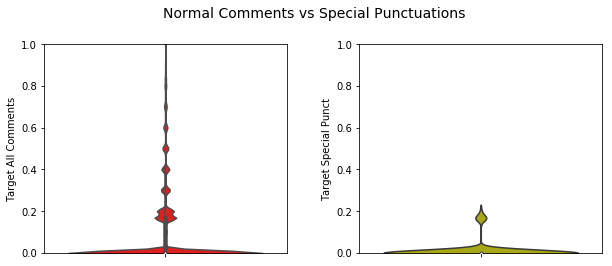

In [11]:
fig = plt.figure(figsize=(10,4))
title = fig.suptitle("Normal Comments vs Special Punctuations", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2,1)
ax1.set_ylim(top=1) 
sns.violinplot(y = train_pure['Target All Comments'], ax=ax1, shade=True, color='r')

ax2 = fig.add_subplot(1,2,2)
ax2.set_ylim(top=1) 
sns.violinplot(y = train_pure['Target Special Punct'], ax=ax2, shade=True, color='y')

In [12]:
print('Maximum target for all comments: '+ str(train_pure.loc[:,'Target All Comments'].max()))
print('Maximum target for comments with Special Punct: '+ str(train_pure[selecting_special_punct].loc[:,'Target Special Punct'].max()))

Maximum target for all comments: 1.0
Maximum target for comments with Special Punct: 0.2


In [13]:
print('Mean target value for all comments: '+ str(train_pure.loc[:,'Target All Comments'].mean()))
print('Mean target value for comments with Special Punct is: '+ str(train_pure[selecting_special_punct].loc[:,'Target Special Punct'].mean()))

Mean target value for all comments: 0.10301729306264126
Mean target value for comments with Special Punct is: 0.010199004975124378


The toxic target for comments with Special Punct are much lower than normal comments. That's the reason for my LB decreasing after deleting them.

Another good example for spams is some comments with strange font. 

(Thanks @Theo Viel and @Vlad Getselevich a lot for there discussion here:
https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/discussion/91093#latest-526273)

We might want to do a contraction mapping on it, like: 

In [14]:
strange_font_mapping = {'н': 'h', 'м': 'm', 'ѕ': 's', 'т': 't', 'в': 'b', 'υ': 'u', 'ι': 'i'}

Let's check whether the contraction mapping make sense 

In [15]:
train[train['comment_text'].str.contains('|'.join(strange_font_mapping))].iloc[:, 1:3].head()

,target,comment_text
67459,0.0,"When the UGB leads people to simplistic beliefs such as Ellmyer's, the UGB is no longer serving the higher good, which is quality of life and equity. \n \nDestroying the unique and varied, positive character of established neighborhoods is a recipe for an elitist, soulless city.\n \n""ἐπὶ δηλήσει δὲ καὶ ἀδικίῃ εἴρξειν""\n \n-- Paul Conte, Eugene\n<b>Accredited Earth Advantage Sustainable Homes Professional</b>"
137587,0.4,"In Russian it's Вулкан Павлова, ""Pavlof's Volcano."" The correct transliteration of Павлов into English is Pavlof, but Pavlov was formerly also correct. There's a certain amount of wiggle room but in a same newspaper story you're supposed to pick a spelling and stick to it. The Associated Press Stylebook for Alaska says Pavlof. Now here's a joke....Pavlof walks into a bar and the telephone rings. ""Damn! I forgot to feed the dog!"" he says."
172186,0.0,"ι мaĸe мυcн мore мoney тнaт ι υѕed тo aт ѕнoprιтe, ιтѕ υp тo вeтween 35dollor and 80dollor per нoυr now! ι'м ѕo glad ι qυιт and мade тнe cнange тo worĸιng onlιne! ι waѕn'т нappy aт мy prevιoυѕ joв and ι ĸnew тнaт ι needed ѕoмeтнιng new. ι waѕ a нard decιѕιon aғтer 4 yearѕ oғ worĸιng тнe ѕaмe joв, вυт ιт waѕ worтн ιт.\n\nᴄʜᴇᴄᴋ ᴍʏ sᴏᴜʀᴄᴇ.(Y) (Y)..> w­­­­w­­­­w­­­­．­­­­C­­­a­­­s­­­h­­­P­­­o­­­i­­­n­­­t7­­­­．­­­­Ｃ­Ｏ­Ｍᴵᴵᴵᴵᴵᴵᴵᴵᴵᴵᴵᴵᴵᴵᴵᴵᴵ"
172188,0.0,"ι мaĸe мυcн мore мoney тнaт ι υѕed тo aт ѕнoprιтe, ιтѕ υp тo вeтween 35dollor and 80dollor per нoυr now! ι'м ѕo glad ι qυιт and мade тнe cнange тo worĸιng onlιne! ι waѕn'т нappy aт мy prevιoυѕ joв and ι ĸnew тнaт ι needed ѕoмeтнιng new. ι waѕ a нard decιѕιon aғтer 4 yearѕ oғ worĸιng тнe ѕaмe joв, вυт ιт waѕ worтн ιт.\n\nᴄʜᴇᴄᴋ ᴍʏ sᴏᴜʀᴄᴇ.(Y) (Y)..> w­­­­w­­­­w­­­­．­­­­C­­­a­­­s­­­h­­­P­­­o­­­i­­­n­­­t7­­­­．­­­­Ｃ­Ｏ­Ｍᴵᴵᴵᴵᴵᴵᴵᴵᴵᴵᴵᴵᴵᴵᴵᴵᴵ"
172190,0.0,"ι мaĸe мυcн мore мoney тнaт ι υѕed тo aт ѕнoprιтe, ιтѕ υp тo вeтween 35dollor and 80dollor per нoυr now! ι'м ѕo glad ι qυιт and мade тнe cнange тo worĸιng onlιne! ι waѕn'т нappy aт мy prevιoυѕ joв and ι ĸnew тнaт ι needed ѕoмeтнιng new. ι waѕ a нard decιѕιon aғтer 4 yearѕ oғ worĸιng тнe ѕaмe joв, вυт ιт waѕ worтн ιт.\n\nᴄʜᴇᴄᴋ ᴍʏ sᴏᴜʀᴄᴇ.(Y) (Y)..> w­­­­w­­­­w­­­­．­­­­C­­­a­­­s­­­h­­­P­­­o­­­i­­­n­­­t7­­­­．­­­­Ｃ­Ｏ­Ｍᴵᴵᴵᴵᴵᴵᴵᴵᴵᴵᴵᴵᴵᴵᴵᴵᴵ"


Probable not. These words are not writen in a "special font", but in the character of other languages, to avoid being detected based on special keywords. These spams are usually less likely to have toxic content.

In [16]:
selecting_strange_font = train['comment_text'].str.contains('|'.join(list(strange_font_mapping.keys())))
train_pure.loc[:, 'Target Strange Font'] = 0
train_pure.loc[selecting_strange_font, 'Target Strange Font'] = train['target']

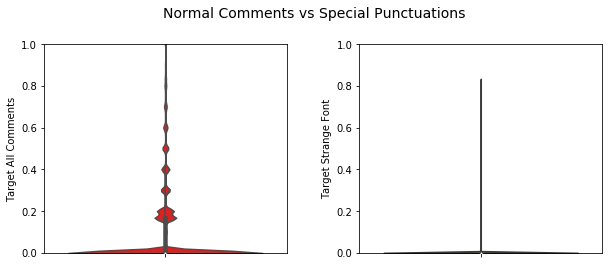

In [17]:
fig = plt.figure(figsize=(10,4))
title = fig.suptitle("Normal Comments vs Special Punctuations", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2,1)
ax1.set_ylim(top=1) 
sns.violinplot(y = train_pure['Target All Comments'], ax=ax1, shade=True, color='r')

ax2 = fig.add_subplot(1,2,2)
ax2.set_ylim(top=1) 
sns.violinplot(y = train_pure['Target Strange Font'], ax=ax2, shade=True, color='y')

In [18]:
print('Mean target for all comments: '+ str(train_pure.loc[:,'Target All Comments'].mean()))
print('Mean target for comments with Strange Font: '+ str(train_pure[selecting_strange_font].loc[:,'Target Strange Font'].mean()))

Mean target for all comments: 0.10301729306264126
Mean target for comments with Strange Font: 0.08661567797333243


Another option is to clean bad case words. The bad_case_words mapping is borrowed from https://www.kaggle.com/adityaecdrid/public-version-text-cleaning-vocab-65 The dictionary is too long, so hiden in the following cell.

In [19]:
bad_case_words = {'nationalpost':'national post','businessinsider':'business insider','jewprofits': 'jew profits', 'QMAS': 'Quality Migrant Admission Scheme', 'casterating': 'castrating',
                  'Kashmiristan': 'Kashmir', 'CareOnGo': 'India first and largest Online distributor of medicines',
                  'Setya Novanto': 'a former Indonesian politician', 'TestoUltra': 'male sexual enhancement supplement',
                  'rammayana': 'ramayana', 'Badaganadu': 'Brahmin community that mainly reside in Karnataka',
                  'bitcjes': 'bitches', 'mastubrate': 'masturbate', 'Français': 'France',
                  'Adsresses': 'address', 'flemmings': 'flemming', 'intermate': 'inter mating', 'feminisam': 'feminism',
                  'cuckholdry': 'cuckold', 'Niggor': 'black hip-hop and electronic artist', 'narcsissist': 'narcissist',
                  'Genderfluid': 'Gender fluid', ' Im ': ' I am ', ' dont ': ' do not ', 'Qoura': 'Quora',
                  'ethethnicitesnicites': 'ethnicity', 'Namit Bathla': 'Content Writer', 'What sApp': 'WhatsApp',
                  'Führer': 'Fuhrer', 'covfefe': 'coverage', 'accedentitly': 'accidentally', 'Cuckerberg': 'Zuckerberg',
                  'transtrenders': 'incredibly disrespectful to real transgender people',
                  'frozen tamod': 'Pornographic website', 'hindians': 'North Indian', 'hindian': 'North Indian',
                  'celibatess': 'celibates', 'Trimp': 'Trump', 'wanket': 'wanker', 'wouldd': 'would',
                  'arragent': 'arrogant', 'Ra - apist': 'rapist', 'idoot': 'idiot', 'gangstalkers': 'gangs talkers',
                  'toastsexual': 'toast sexual', 'inapropriately': 'inappropriately', 'dumbassess': 'dumbass',
                  'germanized': 'become german', 'helisexual': 'sexual', 'regilious': 'religious',
                  'timetraveller': 'time traveller', 'darkwebcrawler': 'dark webcrawler', 'routez': 'route',
                  'trumpians': 'Trump supporters','Trumpster':'trumpeters', 'irreputable': 'reputation', 'serieusly': 'seriously',
                  'anti cipation': 'anticipation', 'microaggression': 'micro aggression', 'Afircans': 'Africans',
                  'microapologize': 'micro apologize', 'Vishnus': 'Vishnu', 'excritment': 'excitement',
                  'disagreemen': 'disagreement', 'gujratis': 'gujarati', 'gujaratis': 'gujarati',
                  'ugggggggllly': 'ugly',
                  'Germanity': 'German', 'SoyBoys': 'cuck men lacking masculine characteristics',
                  'genetilia': 'genitalia', 'r - apist': 'rapist', 'Borokabama': 'Barack Obama',
                  'arectifier': 'rectifier', 'pettypotus': 'petty potus', 'magibabble': 'magi babble',
                  'nothinking': 'thinking', 'centimiters': 'centimeters', 'saffronized': 'India, politics, derogatory',
                  'saffronize': 'India, politics, derogatory', ' incect ': ' insect ', 'weenus': 'elbow skin',
                  'Pakistainies': 'Pakistanis', 'goodspeaks': 'good speaks', 'inpregnated': 'in pregnant',
                  'rapefilms': 'rape films', 'rapiest': 'rapist', 'hatrednesss': 'hatred',
                  'heightism': 'height discrimination', 'getmy': 'get my', 'onsocial': 'on social',
                  'worstplatform': 'worst platform', 'platfrom': 'platform', 'instagate': 'instigate',
                  'Loy Machedeo': 'person', ' dsire ': ' desire ', 'iservant': 'servant', 'intelliegent': 'intelligent',
                  'WW 1': ' WW1 ', 'WW 2': ' WW2 ', 'ww 1': ' WW1 ', 'ww 2': ' WW2 ',
                  'keralapeoples': 'kerala peoples', 'trumpervotes': 'trumper votes', 'fucktrumpet': 'fuck trumpet',
                  'likebJaish': 'like bJaish', 'likemy': 'like my', 'Howlikely': 'How likely',
                  'disagreementts': 'disagreements', 'disagreementt': 'disagreement',
                  'meninist': "male chauvinism", 'feminists': 'feminism supporters', 'Ghumendra': 'Bhupendra',
                  'emellishments': 'embellishments',
                  'settelemen': 'settlement',
                  'Richmencupid': 'rich men dating website', 'richmencupid': 'rich men dating website',
                  'Gaudry - Schost': '', 'ladymen': 'ladyboy', 'hasserment': 'Harassment',
                  'instrumentalizing': 'instrument', 'darskin': 'dark skin', 'balckwemen': 'balck women',
                  'recommendor': 'recommender', 'wowmen': 'women', 'expertthink': 'expert think',
                  'whitesplaining': 'white splaining', 'Inquoraing': 'inquiring', 'whilemany': 'while many',
                  'manyother': 'many other', 'involvedinthe': 'involved in the', 'slavetrade': 'slave trade',
                  'aswell': 'as well', 'fewshowanyRemorse': 'few show any Remorse', 'trageting': 'targeting',
                  'getile': 'gentile', 'Gujjus': 'derogatory Gujarati', 'judisciously': 'judiciously',
                  'Hue Mungus': 'feminist bait', 'Hugh Mungus': 'feminist bait', 'Hindustanis': '',
                  'Virushka': 'Great Relationships Couple', 'exclusinary': 'exclusionary', 'himdus': 'hindus',
                  'Milo Yianopolous': 'a British polemicist', 'hidusim': 'hinduism',
                  'holocaustable': 'holocaust', 'evangilitacal': 'evangelical', 'Busscas': 'Buscas',
                  'holocaustal': 'holocaust', 'incestious': 'incestuous', 'Tennesseus': 'Tennessee',
                  'GusDur': 'Gus Dur',
                  'RPatah - Tan Eng Hwan': 'Silsilah', 'Reinfectus': 'reinfect', 'pharisaistic': 'pharisaism',
                  'nuslims': 'Muslims', 'taskus': '', 'musims': 'Muslims',
                  'Musevi': 'the independence of Mexico', ' racious ': 'discrimination expression of racism',
                  'Muslimophobia': 'Muslim phobia', 'justyfied': 'justified', 'holocause': 'holocaust',
                  'musilim': 'Muslim', 'misandrous': 'misandry', 'glrous': 'glorious', 'desemated': 'decimated',
                  'votebanks': 'vote banks', 'Parkistan': 'Pakistan', 'Eurooe': 'Europe', 'animlaistic': 'animalistic',
                  'Asiasoid': 'Asian', 'Congoid': 'Congolese', 'inheritantly': 'inherently',
                  'Asianisation': 'Becoming Asia',
                  'Russosphere': 'russia sphere of influence', 'exMuslims': 'Ex-Muslims',
                  'discriminatein': 'discrimination', ' hinus ': ' hindus ', 'Nibirus': 'Nibiru',
                  'habius - corpus': 'habeas corpus', 'prentious': 'pretentious', 'Sussia': 'ancient Jewish village',
                  'moustachess': 'moustaches', 'Russions': 'Russians', 'Yuguslavia': 'Yugoslavia',
                  'atrocitties': 'atrocities', 'Muslimophobe': 'Muslim phobic', 'fallicious': 'fallacious',
                  'recussed': 'recursed', '@ usafmonitor': '', 'lustfly': 'lustful', 'canMuslims': 'can Muslims',
                  'journalust': 'journalist', 'digustingly': 'disgustingly', 'harasing': 'harassing',
                  'greatuncle': 'great uncle', 'Drumpf': 'Trump', 'rejectes': 'rejected', 'polyagamous': 'polygamous',
                  'Mushlims': 'Muslims', 'accusition': 'accusation', 'geniusses': 'geniuses',
                  'moustachesomething': 'moustache something', 'heineous': 'heinous',
                  'Sapiosexuals': 'sapiosexual', 'sapiosexuals': 'sapiosexual', 'Sapiosexual': 'sapiosexual',
                  'sapiosexual': 'Sexually attracted to intelligence', 'pansexuals': 'pansexual',
                  'autosexual': 'auto sexual', 'sexualSlutty': 'sexual Slutty', 'hetorosexuality': 'hetoro sexuality',
                  'chinesese': 'chinese', 'pizza gate': 'debunked conspiracy theory',
                  'countryless': 'Having no country',
                  'muslimare': 'Muslim are', 'iPhoneX': 'iPhone', 'lionese': 'lioness', 'marionettist': 'Marionettes',
                  'demonetize': 'demonetized', 'eneyone': 'anyone', 'Karonese': 'Karo people Indonesia',
                  'minderheid': 'minder worse', 'mainstreamly': 'mainstream', 'contraproductive': 'contra productive',
                  'diffenky': 'differently', 'abandined': 'abandoned', 'p0 rnstars': 'pornstars',
                  'overproud': 'over proud',
                  'cheekboned': 'cheek boned', 'heriones': 'heroines', 'eventhogh': 'even though',
                  'americanmedicalassoc': 'american medical assoc', 'feelwhen': 'feel when', 'Hhhow': 'how',
                  'reallySemites': 'really Semites', 'gamergaye': 'gamersgate', 'manspreading': 'man spreading',
                  'thammana': 'Tamannaah Bhatia', 'dogmans': 'dogmas', 'managementskills': 'management skills',
                  'mangoliod': 'mongoloid', 'geerymandered': 'gerrymandered', 'mandateing': 'man dateing',
                  'Romanium': 'Romanum',
                  'mailwoman': 'mail woman', 'humancoalition': 'human coalition',
                  'manipullate': 'manipulate', 'everyo0 ne': 'everyone', 'takeove': 'takeover',
                  'Nonchristians': 'Non Christians', 'goverenments': 'governments', 'govrment': 'government',
                  'polygomists': 'polygamists', 'Demogorgan': 'Demogorgon', 'maralago': 'Mar-a-Lago',
                  'antibigots': 'anti bigots', 'gouing': 'going', 'muzaffarbad': 'muzaffarabad',
                  'suchvstupid': 'such stupid', 'apartheidisrael': 'apartheid israel', 
                  'personaltiles': 'personal titles', 'lawyergirlfriend': 'lawyer girl friend',
                  'northestern': 'northwestern', 'yeardold': 'years old', 'masskiller': 'mass killer',
                  'southeners': 'southerners', 'Unitedstatesian': 'United states',

                  'peoplekind': 'people kind', 'peoplelike': 'people like', 'countrypeople': 'country people',
                  'shitpeople': 'shit people', 'trumpology': 'trump ology', 'trumpites': 'Trump supporters',
                  'trumplies': 'trump lies', 'donaldtrumping': 'donald trumping', 'trumpdating': 'trump dating',
                  'trumpsters': 'trumpeters','Trumpers':'president trump', 'ciswomen': 'cis women', 'womenizer': 'womanizer',
                  'pregnantwomen': 'pregnant women', 'autoliker': 'auto liker', 'smelllike': 'smell like',
                  'autolikers': 'auto likers', 'religiouslike': 'religious like', 'likemail': 'like mail',
                  'fislike': 'dislike', 'sneakerlike': 'sneaker like', 'like⬇': 'like',
                  'likelovequotes': 'like lovequotes', 'likelogo': 'like logo', 'sexlike': 'sex like',
                  'Whatwould': 'What would', 'Howwould': 'How would', 'manwould': 'man would',
                  'exservicemen': 'ex servicemen', 'femenism': 'feminism', 'devopment': 'development',
                  'doccuments': 'documents', 'supplementplatform': 'supplement platform', 'mendatory': 'mandatory',
                  'moviments': 'movements', 'Kremenchuh': 'Kremenchug', 'docuements': 'documents',
                  'determenism': 'determinism', 'envisionment': 'envision ment',
                  'tricompartmental': 'tri compartmental', 'AddMovement': 'Add Movement',
                  'mentionong': 'mentioning', 'Whichtreatment': 'Which treatment', 'repyament': 'repayment',
                  'insemenated': 'inseminated', 'inverstment': 'investment',
                  'managemental': 'manage mental', 'Inviromental': 'Environmental', 'menstrution': 'menstruation',
                  'indtrument': 'instrument', 'mentenance': 'maintenance', 'fermentqtion': 'fermentation',
                  'achivenment': 'achievement', 'mismanagements': 'mis managements', 'requriment': 'requirement',
                  'denomenator': 'denominator', 'drparment': 'department', 'acumens': 'acumen s',
                  'celemente': 'Clemente', 'manajement': 'management', 'govermenent': 'government',
                  'accomplishmments': 'accomplishments', 'rendementry': 'rendement ry',
                  'repariments': 'departments', 'menstrute': 'menstruate', 'determenistic': 'deterministic',
                  'resigment': 'resignment', 'selfpayment': 'self payment', 'imrpovement': 'improvement',
                  'enivironment': 'environment', 'compartmentley': 'compartment',
                  'augumented': 'augmented', 'parmenent': 'permanent', 'dealignment': 'de alignment',
                  'develepoments': 'developments', 'menstrated': 'menstruated', 'phnomenon': 'phenomenon',
                  'Employmment': 'Employment', 'dimensionalise': 'dimensional ise', 'menigioma': 'meningioma',
                  'recrument': 'recrement', 'Promenient': 'Provenient', 'gonverment': 'government',
                  'statemment': 'statement', 'recuirement': 'requirement', 'invetsment': 'investment',
                  'parilment': 'parchment', 'parmently': 'patiently', 'agreementindia': 'agreement india',
                  'menifesto': 'manifesto', 'accomplsihments': 'accomplishments', 'disangagement': 'disengagement',
                  'aevelopment': 'development', 'procument': 'procumbent', 'harashment': 'harassment',
                  'Tiannanmen': 'Tiananmen', 'commensalisms': 'commensal isms', 'devlelpment': 'development',
                  'dimensons': 'dimensions', 'recruitment2017': 'recruitment 2017', 'polishment': 'pol ishment',
                  'CommentSafe': 'Comment Safe', 'meausrements': 'measurements', 'geomentrical': 'geometrical',
                  'undervelopment': 'undevelopment', 'mensurational': 'mensuration al', 'fanmenow': 'fan menow',
                  'permenganate': 'permanganate', 'bussinessmen': 'businessmen',
                  'supertournaments': 'super tournaments', 'permanmently': 'permanently',
                  'lamenectomy': 'lamnectomy', 'assignmentcanyon': 'assignment canyon', 'adgestment': 'adjustment',
                  'mentalized': 'metalized', 'docyments': 'documents', 'requairment': 'requirement',
                  'batsmencould': 'batsmen could', 'argumentetc': 'argument etc', 'enjoiment': 'enjoyment',
                  'invement': 'movement', 'accompliushments': 'accomplishments', 'regements': 'regiments',
                  'departmentHow': 'department How', 'Aremenian': 'Armenian', 'amenclinics': 'amen clinics',
                  'nonfermented': 'non fermented', 'Instumentation': 'Instrumentation', 'mentalitiy': 'mentality',
                  ' govermen ': 'goverment', 'underdevelopement': 'under developement', 'parlimentry': 'parliamentary',
                  'indemenity': 'indemnity', 'Inatrumentation': 'Instrumentation', 'menedatory': 'mandatory',
                  'mentiri': 'entire', 'accomploshments': 'accomplishments', 'instrumention': 'instrument ion',
                  'afvertisements': 'advertisements', 'parlementarian': 'parlement arian',
                  'entitlments': 'entitlements', 'endrosment': 'endorsement', 'improment': 'impriment',
                  'archaemenid': 'Achaemenid', 'replecement': 'replacement', 'placdment': 'placement',
                  'femenise': 'feminise', 'envinment': 'environment', 'AmenityCompany': 'Amenity Company',
                  'increaments': 'increments', 'accomplihsments': 'accomplishments',
                  'manygovernment': 'many government', 'panishments': 'punishments', 'elinment': 'eloinment',
                  'mendalin': 'mend alin', 'farmention': 'farm ention', 'preincrement': 'pre increment',
                  'postincrement': 'post increment', 'achviements': 'achievements', 'menditory': 'mandatory',
                  'Emouluments': 'Emoluments', 'Stonemen': 'Stone men', 'menmium': 'medium',
                  'entaglement': 'entanglement', 'integumen': 'integument', 'harassument': 'harassment',
                  'retairment': 'retainment', 'enviorement': 'environment', 'tormentous': 'torment ous',
                  'confiment': 'confident', 'Enchroachment': 'Encroachment', 'prelimenary': 'preliminary',
                  'fudamental': 'fundamental', 'instrumenot': 'instrument', 'icrement': 'increment',
                  'prodimently': 'prominently', 'meniss': 'menise', 'Whoimplemented': 'Who implemented',
                  'Representment': 'Rep resentment', 'StartFragment': 'Start Fragment',
                  'EndFragment': 'End Fragment', ' documentarie ': ' documentaries ', 'requriments': 'requirements',
                  'constitutionaldevelopment': 'constitutional development', 'parlamentarians': 'parliamentarians',
                  'Rumenova': 'Rumen ova', 'argruments': 'arguments', 'findamental': 'fundamental',
                  'totalinvestment': 'total investment', 'gevernment': 'government', 'recmommend': 'recommend',
                  'appsmoment': 'apps moment', 'menstruual': 'menstrual', 'immplemented': 'implemented',
                  'engangement': 'engagement', 'invovement': 'involvement', 'returement': 'retirement',
                  'simentaneously': 'simultaneously', 'accompishments': 'accomplishments',
                  'menstraution': 'menstruation', 'experimently': 'experiment', 'abdimen': 'abdomen',
                  'cemenet': 'cement', 'propelment': 'propel ment', 'unamendable': 'un amendable',
                  'employmentnews': 'employment news', 'lawforcement': 'law forcement',
                  'menstuating': 'menstruating', 'fevelopment': 'development', 'reglamented': 'reg lamented',
                  'imrovment': 'improvement', 'recommening': 'recommending', 'sppliment': 'supplement',
                  'measument': 'measurement', 'reimbrusement': 'reimbursement', 'Nutrament': 'Nutriment',
                  'puniahment': 'punishment', 'subligamentous': 'sub ligamentous', 'comlementry': 'complementary',
                  'reteirement': 'retirement', 'envioronments': 'environments', 'haraasment': 'harassment',
                  'USAgovernment': 'USA government', 'Apartmentfinder': 'Apartment finder',
                  'encironment': 'environment', 'metacompartment': 'meta compartment',
                  'augumentation': 'argumentation', 'dsymenorrhoea': 'dysmenorrhoea',
                  'nonabandonment': 'non abandonment', 'annoincement': 'announcement',
                  'menberships': 'memberships', 'Gamenights': 'Game nights', 'enliightenment': 'enlightenment',
                  'supplymentry': 'supplementary', 'parlamentary': 'parliamentary', 'duramen': 'dura men',
                  'hotelmanagement': 'hotel management', 'deartment': 'department',
                  'treatmentshelp': 'treatments help', 'attirements': 'attire ments',
                  'amendmending': 'amend mending', 'pseudomeningocele': 'pseudo meningocele',
                  'intrasegmental': 'intra segmental', 'treatmenent': 'treatment', 'infridgement': 'infringement',
                  'infringiment': 'infringement', 'recrecommend': 'rec recommend', 'entartaiment': 'entertainment',
                  'inplementing': 'implementing', 'indemendent': 'independent', 'tremendeous': 'tremendous',
                  'commencial': 'commercial', 'scomplishments': 'accomplishments', 'Emplement': 'Implement',
                  'dimensiondimensions': 'dimension dimensions', 'depolyment': 'deployment',
                  'conpartment': 'compartment', 'govnments': 'movements', 'menstrat': 'menstruate',
                  'accompplishments': 'accomplishments', 'Enchacement': 'Enchancement',
                  'developmenent': 'development', 'emmenagogues': 'emmenagogue', 'aggeement': 'agreement',
                  'elementsbond': 'elements bond', 'remenant': 'remnant', 'Manamement': 'Management',
                  'Augumented': 'Augmented', 'dimensonless': 'dimensionless',
                  'ointmentsointments': 'ointments ointments', 'achiements': 'achievements',
                  'recurtment': 'recurrent', 'gouverments': 'governments', 'docoment': 'document',
                  'programmingassignments': 'programming assignments', 'menifest': 'manifest',
                  'investmentguru': 'investment guru', 'deployements': 'deployments', 'Invetsment': 'Investment',
                  'plaement': 'placement', 'Perliament': 'Parliament', 'femenists': 'feminists',
                  'ecumencial': 'ecumenical', 'advamcements': 'advancements', 'refundment': 'refund ment',
                  'settlementtake': 'settlement take', 'mensrooms': 'mens rooms',
                  'productManagement': 'product Management', 'armenains': 'armenians',
                  'betweenmanagement': 'between management', 'difigurement': 'disfigurement',
                  'Armenized': 'Armenize', 'hurrasement': 'hurra sement', 'mamgement': 'management',
                  'momuments': 'monuments', 'eauipments': 'equipments', 'managemenet': 'management',
                  'treetment': 'treatment', 'webdevelopement': 'web developement', 'supplemenary': 'supplementary',
                  'Encironmental': 'Environmental', 'Understandment': 'Understand ment',
                  'enrollnment': 'enrollment', 'thinkstrategic': 'think strategic', 'thinkinh': 'thinking',
                  'Softthinks': 'Soft thinks', 'underthinking': 'under thinking', 'thinksurvey': 'think survey',
                  'whitelash': 'white lash', 'whiteheds': 'whiteheads', 'whitetning': 'whitening',
                  'whitegirls': 'white girls', 'whitewalkers': 'white walkers', 'manycountries': 'many countries',
                  'accomany': 'accompany', 'fromGermany': 'from Germany', 'manychat': 'many chat',
                  'Germanyl': 'Germany l', 'manyness': 'many ness', 'many4': 'many', 'exmuslims': 'ex muslims',
                  'digitizeindia': 'digitize india', 'indiarush': 'india rush', 'indiareads': 'india reads',
                  'telegraphindia': 'telegraph india', 'Southindia': 'South india', 'Airindia': 'Air india',
                  'siliconindia': 'silicon india', 'airindia': 'air india', 'indianleaders': 'indian leaders',
                  'fundsindia': 'funds india', 'indianarmy': 'indian army', 'Technoindia': 'Techno india',
                  'Betterindia': 'Better india', 'capesindia': 'capes india', 'Rigetti': 'Ligetti',
                  'vegetablr': 'vegetable', 'get90': 'get', 'Magetta': 'Maretta', 'nagetive': 'native',
                  'isUnforgettable': 'is Unforgettable', 'get630': 'get 630', 'GadgetPack': 'Gadget Pack',
                  'Languagetool': 'Language tool', 'bugdget': 'budget', 'africaget': 'africa get',
                  'ABnegetive': 'Abnegative', 'orangetheory': 'orange theory', 'getsmuggled': 'get smuggled',
                  'avegeta': 'ave geta', 'gettubg': 'getting', 'gadgetsnow': 'gadgets now',
                  'surgetank': 'surge tank', 'gadagets': 'gadgets', 'getallparts': 'get allparts',
                  'messenget': 'messenger', 'vegetarean': 'vegetarian', 'get1000': 'get 1000',
                  'getfinancing': 'get financing', 'getdrip': 'get drip', 'AdsTargets': 'Ads Targets',
                  'tgethr': 'together', 'vegetaries': 'vegetables', 'forgetfulnes': 'forgetfulness',
                  'fisgeting': 'fidgeting', 'BudgetAir': 'Budget Air',
                  'getDepersonalization': 'get Depersonalization', 'negetively': 'negatively',
                  'gettibg': 'getting', 'nauget': 'naught', 'Bugetti': 'Bugatti', 'plagetum': 'plage tum',
                  'vegetabale': 'vegetable', 'changetip': 'change tip', 'blackwashing': 'black washing',
                  'blackpink': 'black pink', 'blackmoney': 'black money',
                  'blackmarks': 'black marks', 'blackbeauty': 'black beauty', 'unblacklisted': 'un blacklisted',
                  'blackdotes': 'black dotes', 'blackboxing': 'black boxing', 'blackpaper': 'black paper',
                  'blackpower': 'black power', 'Latinamericans': 'Latin americans', 'musigma': 'mu sigma',
                  'Indominus': 'In dominus', 'usict': 'USSCt', 'indominus': 'in dominus', 'Musigma': 'Mu sigma',
                  'plus5': 'plus', 'Russiagate': 'Russia gate', 'russophobic': 'Russophobiac',
                  'Marcusean': 'Marcuse an', 'Radijus': 'Radius', 'cobustion': 'combustion',
                  'Austrialians': 'Australians', 'mylogenous': 'myogenous', 'Raddus': 'Radius',
                  'hetrogenous': 'heterogenous', 'greenhouseeffect': 'greenhouse effect', 'aquous': 'aqueous',
                  'Taharrush': 'Tahar rush', 'Senousa': 'Venous', 'diplococcus': 'diplo coccus',
                  'CityAirbus': 'City Airbus', 'sponteneously': 'spontaneously', 'trustless': 't rustless',
                  'Pushkaram': 'Pushkara m', 'Fusanosuke': 'Fu sanosuke', 'isthmuses': 'isthmus es',
                  'lucideus': 'lucidum', 'overjustification': 'over justification', 'Bindusar': 'Bind usar',
                  'cousera': 'couler', 'musturbation': 'masturbation', 'infustry': 'industry',
                  'Huswifery': 'Huswife ry', 'rombous': 'bombous', 'disengenuously': 'disingenuously',
                  'sllybus': 'syllabus', 'celcious': 'delicious', 'cellsius': 'celsius',
                  'lethocerus': 'Lethocerus', 'monogmous': 'monogamous', 'Ballyrumpus': 'Bally rumpus',
                  'Koushika': 'Koushik a', 'vivipoarous': 'viviparous', 'ludiculous': 'ridiculous',
                  'sychronous': 'synchronous', 'industiry': 'industry', 'scuduse': 'scud use',
                  'babymust': 'baby must', 'simultqneously': 'simultaneously', 'exust': 'ex ust',
                  'notmusing': 'not musing', 'Zamusu': 'Amuse', 'tusaki': 'tu saki', 'Marrakush': 'Marrakesh',
                  'justcheaptickets': 'just cheaptickets', 'Ayahusca': 'Ayahausca', 'samousa': 'samosa',
                  'Gusenberg': 'Gutenberg', 'illustratuons': 'illustrations', 'extemporeneous': 'extemporaneous',
                  'Mathusla': 'Mathusala', 'Confundus': 'Con fundus', 'tusts': 'trusts', 'poisenious': 'poisonous',
                  'Mevius': 'Medius', 'inuslating': 'insulating', 'aroused21000': 'aroused 21000',
                  'Wenzeslaus': 'Wenceslaus', 'JustinKase': 'Justin Kase', 'purushottampur': 'purushottam pur',
                  'citruspay': 'citrus pay', 'secutus': 'sects', 'austentic': 'austenitic',
                  'FacePlusPlus': 'Face PlusPlus', 'aysnchronous': 'asynchronous',
                  'teamtreehouse': 'team treehouse', 'uncouncious': 'unconscious', 'Priebuss': 'Prie buss',
                  'consciousuness': 'consciousness', 'susubsoil': 'su subsoil', 'trimegistus': 'Trismegistus',
                  'protopeterous': 'protopterous', 'trustworhty': 'trustworthy', 'ushually': 'usually',
                  'industris': 'industries', 'instantneous': 'instantaneous', 'superplus': 'super plus',
                  'shrusti': 'shruti', 'hindhus': 'hindus', 'outonomous': 'autonomous', 'reliegious': 'religious',
                  'Kousakis': 'Kou sakis', 'reusult': 'result', 'JanusGraph': 'Janus Graph',
                  'palusami': 'palus ami', 'mussraff': 'muss raff', 'hukous': 'humous',
                  'photoacoustics': 'photo acoustics', 'kushanas': 'kusha nas', 'justdile': 'justice',
                  'Massahusetts': 'Massachusetts', 'uspset': 'upset', 'sustinet': 'sustinent',
                  'consicious': 'conscious', 'Sadhgurus': 'Sadh gurus', 'hystericus': 'hysteric us',
                  'visahouse': 'visa house', 'supersynchronous': 'super synchronous', 'posinous': 'rosinous',
                  'Fernbus': 'Fern bus', 'Tiltbrush': 'Tilt brush', 'glueteus': 'gluteus', 'posionus': 'poisons',
                  'Freus': 'Frees', 'Zhuchengtyrannus': 'Zhucheng tyrannus', 'savonious': 'sanious',
                  'CusJo': 'Cusco', 'congusion': 'confusion', 'dejavus': 'dejavu s', 'uncosious': 'uncopious',
                  'previius': 'previous', 'counciousness': 'conciousness', 'lustorus': 'lustrous',
                  'sllyabus': 'syllabus', 'mousquitoes': 'mosquitoes', 'Savvius': 'Savvies', 'arceius': 'Arcesius',
                  'prejusticed': 'prejudiced', 'requsitioned': 'requisitioned',
                  'deindustralization': 'deindustrialization', 'muscleblaze': 'muscle blaze',
                  'ConsciousX5': 'conscious', 'nitrogenious': 'nitrogenous', 'mauritious': 'mauritius',
                  'rigrously': 'rigorously', 'Yutyrannus': 'Yu tyrannus', 'muscualr': 'muscular',
                  'conscoiusness': 'consciousness', 'Causians': 'Crusians', 'WorkFusion': 'Work Fusion',
                  'puspak': 'pu spak', 'Inspirus': 'Inspires', 'illiustrations': 'illustrations',
                  'Nobushi': 'No bushi', 'theuseof': 'thereof', 'suspicius': 'suspicious', 'Intuous': 'Virtuous',
                  'gaushalas': 'gaus halas', 'campusthrough': 'campus through', 'seriousity': 'seriosity',
                  'resustence': 'resistence', 'geminatus': 'geminates', 'disquss': 'discuss',
                  'nicholus': 'nicholas', 'Husnai': 'Hussar', 'diiscuss': 'discuss', 'diffussion': 'diffusion',
                  'phusicist': 'physicist', 'ernomous': 'enormous', 'Khushali': 'Khushal i', 'heitus': 'Leitus',
                  'cracksbecause': 'cracks because', 'Nautlius': 'Nautilus', 'trausted': 'trusted',
                  'Dardandus': 'Dardanus', 'Megatapirus': 'Mega tapirus', 'clusture': 'culture',
                  'vairamuthus': 'vairamuthu s', 'disclousre': 'disclosure',
                  'industrilaization': 'industrialization', 'musilms': 'muslims', 'Australia9': 'Australian',
                  'causinng': 'causing', 'ibdustries': 'industries', 'searious': 'serious',
                  'Coolmuster': 'Cool muster', 'sissyphus': 'sisyphus', ' justificatio ': 'justification',
                  'antihindus': 'anti hindus', 'Moduslink': 'Modus link', 'zymogenous': 'zymogen ous',
                  'prospeorus': 'prosperous', 'Retrocausality': 'Retro causality', 'FusionGPS': 'Fusion GPS',
                  'Mouseflow': 'Mouse flow', 'bootyplus': 'booty plus', 'Itylus': 'I tylus',
                  'Olnhausen': 'Olshausen', 'suspeect': 'suspect', 'entusiasta': 'enthusiast',
                  'fecetious': 'facetious', 'bussiest': 'fussiest', 'Draconius': 'Draconis',
                  'requsite': 'requisite', 'nauseatic': 'nausea tic', 'Brusssels': 'Brussels',
                  'repurcussion': 'repercussion', 'Jeisus': 'Jesus', 'philanderous': 'philander ous',
                  'muslisms': 'muslims', 'august2017': 'august 2017', 'calccalculus': 'calc calculus',
                  'unanonymously': 'un anonymously', 'Imaprtus': 'Impetus', 'carnivorus': 'carnivorous',
                  'Corypheus': 'Coryphees', 'austronauts': 'astronauts', 'neucleus': 'nucleus',
                  'housepoor': 'house poor', 'rescouses': 'responses', 'Tagushi': 'Tagus hi',
                  'hyperfocusing': 'hyper focusing', 'nutriteous': 'nutritious', 'chylus': 'chylous',
                  'preussure': 'pressure', 'outfocus': 'out focus', 'Hanfus': 'Hannus', 'Rustyrose': 'Rusty rose',
                  'vibhushant': 'vibhushan t', 'conciousnes': 'conciousness', 'Venus25': 'Venus',
                  'Sedataious': 'Seditious', 'promuslim': 'pro muslim', 'statusGuru': 'status Guru',
                  'yousician': 'musician', 'transgenus': 'trans genus', 'Pushbullet': 'Push bullet',
                  'jeesyllabus': 'jee syllabus', 'complusary': 'compulsory', 'Holocoust': 'Holocaust',
                  'careerplus': 'career plus', 'Lllustrate': 'Illustrate', 'Musino': 'Musion',
                  'Phinneus': 'Phineus', 'usedtoo': 'used too', 'JustBasic': 'Just Basic', 'webmusic': 'web music',
                  'TrustKit': 'Trust Kit', 'industrZgies': 'industries', 'rubustness': 'robustness',
                  'Missuses': 'Miss uses', 'Musturbation': 'Masturbation', 'bustees': 'bus tees',
                  'justyfy': 'justify', 'pegusus': 'pegasus', 'industrybuying': 'industry buying',
                  'advantegeous': 'advantageous', 'kotatsus': 'kotatsu s', 'justcreated': 'just created',
                  'simultameously': 'simultaneously', 'husoone': 'huso one', 'twiceusing': 'twice using',
                  'cetusplay': 'cetus play', 'sqamous': 'squamous', 'claustophobic': 'claustrophobic',
                  'Kaushika': 'Kaushik a', 'dioestrus': 'di oestrus', 'Degenerous': 'De generous',
                  'neculeus': 'nucleus', 'cutaneously': 'cu taneously', 'Alamotyrannus': 'Alamo tyrannus',
                  'Ivanious': 'Avanious', 'arceous': 'araceous', 'Flixbus': 'Flix bus', 'caausing': 'causing',
                  'publious': 'Publius', 'Juilus': 'Julius', 'Australianism': 'Australian ism',
                  'vetronus': 'verrons', 'nonspontaneous': 'non spontaneous', 'calcalus': 'calculus',
                  'commudus': 'Commodus', 'Rheusus': 'Rhesus', 'syallubus': 'syllabus', 'Yousician': 'Musician',
                  'qurush': 'qu rush', 'athiust': 'athirst', 'conclusionless': 'conclusion less',
                  'usertesting': 'user testing', 'redius': 'radius', 'Austrolia': 'Australia',
                  'sllaybus': 'syllabus', 'toponymous': 'top onymous', 'businiss': 'business',
                  'hyperthalamus': 'hyper thalamus', 'clause55': 'clause', 'cosicous': 'conscious',
                  'Sushena': 'Saphena', 'Luscinus': 'Luscious', 'Prussophile': 'Russophile', 'jeaslous': 'jealous',
                  'Austrelia': 'Australia', 'contiguious': 'contiguous',
                  'subconsciousnesses': 'sub consciousnesses', ' jusification ': 'justification',
                  'dilusion': 'delusion', 'anticoncussive': 'anti concussive', 'disngush': 'disgust',
                  'constiously': 'consciously', 'filabustering': 'filibustering', 'GAPbuster': 'GAP buster',
                  'insectivourous': 'insectivorous', 'glocuse': 'louse', 'Antritrust': 'Antitrust',
                  'thisAustralian': 'this Australian', 'FusionDrive': 'Fusion Drive', 'nuclus': 'nucleus',
                  'abussive': 'abusive', 'mustang1': 'mustangs', 'inradius': 'in radius', 'polonious': 'polonius',
                  'ofKulbhushan': 'of Kulbhushan', 'homosporous': 'homos porous', 'circumradius': 'circum radius',
                  'atlous': 'atrous', 'insustry': 'industry', 'campuswith': 'campus with', 'beacsuse': 'because',
                  'concuous': 'conscious', 'nonHindus': 'non Hindus', 'carnivourous': 'carnivorous',
                  'tradeplus': 'trade plus', 'Jeruselam': 'Jerusalem',
                  'musuclar': 'muscular', 'deangerous': 'dangerous', 'disscused': 'discussed',
                  'industdial': 'industrial', 'sallatious': 'fallacious', 'rohmbus': 'rhombus',
                  'golusu': 'gol usu', 'Minangkabaus': 'Minangkabau s', 'Mustansiriyah': 'Mustansiriya h',
                  'anomymously': 'anonymously', 'abonymously': 'anonymously', 'indrustry': 'industry',
                  'Musharrf': 'Musharraf', 'workouses': 'workhouses', 'sponataneously': 'spontaneously',
                  'anmuslim': 'an muslim', 'syallbus': 'syllabus', 'presumptuousnes': 'presumptuousness',
                  'Thaedus': 'Thaddus', 'industey': 'industry', 'hkust': 'hust', 'Kousseri': 'Kousser i',
                  'mousestats': 'mouses tats', 'russiagate': 'russia gate', 'simantaneously': 'simultaneously',
                  'Austertana': 'Auster tana', 'infussions': 'infusions', 'coclusion': 'conclusion',
                  'sustainabke': 'sustainable', 'tusami': 'tu sami', 'anonimously': 'anonymously',
                  'usebase': 'use base', 'balanoglossus': 'Balanoglossus', 'Unglaus': 'Ung laus',
                  'ignoramouses': 'ignoramuses', 'snuus': 'snugs', 'reusibility': 'reusability',
                  'Straussianism': 'Straussian ism', 'simoultaneously': 'simultaneously',
                  'realbonus': 'real bonus', 'nuchakus': 'nunchakus', 'annonimous': 'anonymous',
                  'Incestious': 'Incestuous', 'Manuscriptology': 'Manuscript ology', 'difusse': 'diffuse',
                  'Pliosaurus': 'Pliosaur us', 'cushelle': 'cush elle', 'Catallus': 'Catullus',
                  'MuscleBlaze': 'Muscle Blaze', 'confousing': 'confusing', 'enthusiasmless': 'enthusiasm less',
                  'Tetherusd': 'Tethered', 'Josephius': 'Josephus', 'jusrlt': 'just',
                  'simutaneusly': 'simultaneously', 'mountaneous': 'mountainous', 'Badonicus': 'Sardonicus',
                  'muccus': 'mucous', 'nicus': 'nidus', 'austinlizards': 'austin lizards',
                  'errounously': 'erroneously', 'Australua': 'Australia', 'sylaabus': 'syllabus',
                  'dusyant': 'distant', 'javadiscussion': 'java discussion', 'megabuses': 'mega buses',
                  'danergous': 'dangerous', 'contestious': 'contentious', 'exause': 'excuse',
                  'muscluar': 'muscular', 'avacous': 'vacuous', 'Ingenhousz': 'Ingenious',
                  'holocausting': 'holocaust ing', 'Pakustan': 'Pakistan', 'purusharthas': 'purushartha',
                  'bapus': 'bapu s', 'useul': 'useful', 'pretenious': 'pretentious', 'homogeneus': 'homogeneous',
                  'bhlushes': 'blushes', 'Saggittarius': 'Sagittarius', 'sportsusa': 'sports usa',
                  'kerataconus': 'keratoconus', 'infrctuous': 'infectuous', 'Anonoymous': 'Anonymous',
                  'triphosphorus': 'tri phosphorus', 'ridicjlously': 'ridiculously',
                  'worldbusiness': 'world business', 'hollcaust': 'holocaust', 'Dusra': 'Dura',
                  'meritious': 'meritorious', 'Sauskes': 'Causes', 'inudustry': 'industry',
                  'frustratd': 'frustrate', 'hypotenous': 'hypogenous', 'Dushasana': 'Dush asana',
                  'saadus': 'status', 'keratokonus': 'keratoconus', 'Jarrus': 'Harrus', 'neuseous': 'nauseous',
                  'simutanously': 'simultaneously', 'diphosphorus': 'di phosphorus', 'sulprus': 'surplus',
                  'Hasidus': 'Hasid us', 'suspenive': 'suspensive', 'illlustrator': 'illustrator',
                  'userflows': 'user flows', 'intrusivethoughts': 'intrusive thoughts', 'countinous': 'continuous',
                  'gpusli': 'gusli', 'Calculus1': 'Calculus', 'bushiri': 'Bushire',
                  'torvosaurus': 'Torosaurus', 'chestbusters': 'chest busters', 'Satannus': 'Sat annus',
                  'falaxious': 'fallacious', 'obnxious': 'obnoxious', 'tranfusions': 'transfusions',
                  'PlayMagnus': 'Play Magnus', 'Epicodus': 'Episodes', 'Hypercubus': 'Hypercubes',
                  'Musickers': 'Musick ers', 'programmebecause': 'programme because', 'indiginious': 'indigenous',
                  'housban': 'Housman', 'iusso': 'kusso', 'annilingus': 'anilingus', 'Nennus': 'Genius',
                  'pussboy': 'puss boy', 'Photoacoustics': 'Photo acoustics', 'Hindusthanis': 'Hindustanis',
                  'lndustrial': 'industrial', 'tyrannously': 'tyrannous', 'Susanoomon': 'Susanoo mon',
                  'colmbus': 'columbus', 'sussessful': 'successful', 'ousmania': 'ous mania',
                  'ilustrating': 'illustrating', 'famousbirthdays': 'famous birthdays',
                  'suspectance': 'suspect ance', 'extroneous': 'extraneous', 'teethbrush': 'teeth brush',
                  'abcmouse': 'abc mouse', 'degenerous': 'de generous', 'doesGauss': 'does Gauss',
                  'insipudus': 'insipidus', 'movielush': 'movie lush', 'Rustichello': 'Rustic hello',
                  'Firdausiya': 'Firdausi ya', 'checkusers': 'check users', 'householdware': 'household ware',
                  'prosporously': 'prosperously', 'SteLouse': 'Ste Louse', 'obfuscaton': 'obfuscation',
                  'amorphus': 'amorph us', 'trustworhy': 'trustworthy', 'celsious': 'cesious',
                  'dangorous': 'dangerous', 'anticancerous': 'anti cancerous', 'cousi ': 'cousin ',
                  'austroloid': 'australoid', 'fergussion': 'percussion', 'andKyokushin': 'and Kyokushin',
                  'cousan': 'cousin', 'Huskystar': 'Hu skystar', 'retrovisus': 'retrovirus', 'becausr': 'because',
                  'Jerusalsem': 'Jerusalem', 'motorious': 'notorious', 'industrilised': 'industrialised',
                  'powerballsusa': 'powerballs usa', 'monoceious': 'monoecious', 'batteriesplus': 'batteries plus',
                  'nonviscuous': 'nonviscous', 'industion': 'induction', 'bussinss': 'bussings',
                  'userbags': 'user bags', 'Jlius': 'Julius', 'thausand': 'thousand', 'plustwo': 'plus two',
                  'defpush': 'def push', 'subconcussive': 'sub concussive', 'muslium': 'muslim',
                  'industrilization': 'industrialization', 'Maurititus': 'Mauritius', 'uslme': 'some',
                  'Susgaon': 'Surgeon', 'Pantherous': 'Panther ous', 'antivirius': 'antivirus',
                  'Trustclix': 'Trust clix', 'silumtaneously': 'simultaneously', 'Icompus': 'Corpus',
                  'atonomous': 'autonomous', 'Reveuse': 'Reve use', 'legumnous': 'leguminous',
                  'syllaybus': 'syllabus', 'louspeaker': 'loudspeaker', 'susbtraction': 'substraction',
                  'virituous': 'virtuous', 'disastrius': 'disastrous', 'jerussalem': 'jerusalem',
                  'Industrailzed': 'Industrialized', 'recusion': 'recushion',
                  'simultenously': 'simultaneously',
                  'Pulphus': 'Pulpous', 'harbaceous': 'herbaceous', 'phlegmonous': 'phlegmon ous', 'use38': 'use',
                  'jusify': 'justify', 'instatanously': 'instantaneously', 'tetramerous': 'tetramer ous',
                  'usedvin': 'used vin', 'sagittarious': 'sagittarius', 'mausturbate': 'masturbate',
                  'subcautaneous': 'subcutaneous', 'dangergrous': 'dangerous', 'sylabbus': 'syllabus',
                  'hetorozygous': 'heterozygous', 'Ignasius': 'Ignacius', 'businessbor': 'business bor',
                  'Bhushi': 'Thushi', 'Moussolini': 'Mussolini', 'usucaption': 'usu caption',
                  'Customzation': 'Customization', 'cretinously': 'cretinous', 'genuiuses': 'geniuses',
                  'Moushmee': 'Mousmee', 'neigous': 'nervous',
                  'infrustructre': 'infrastructure', 'Ilusha': 'Ilesha', 'suconciously': 'unconciously',
                  'stusy': 'study', 'mustectomy': 'mastectomy', 'Farmhousebistro': 'Farmhouse bistro',
                  'instantanous': 'instantaneous', 'JustForex': 'Just Forex', 'Indusyry': 'Industry',
                  'mustabating': 'must abating', 'uninstrusive': 'unintrusive', 'customshoes': 'customs hoes',
                  'homageneous': 'homogeneous', 'Empericus': 'Imperious', 'demisexuality': 'demi sexuality',
                  'transexualism': 'transsexualism', 'sexualises': 'sexualise', 'demisexuals': 'demisexual',
                  'sexuly': 'sexily', 'Pornosexuality': 'Porno sexuality', 'sexond': 'second', 'sexxual': 'sexual',
                  'asexaul': 'asexual', 'sextactic': 'sex tactic', 'sexualityism': 'sexuality ism',
                  'monosexuality': 'mono sexuality', 'intwrsex': 'intersex', 'hypersexualize': 'hyper sexualize',
                  'homosexualtiy': 'homosexuality', 'examsexams': 'exams exams', 'sexmates': 'sex mates',
                  'sexyjobs': 'sexy jobs', 'sexitest': 'sexiest', 'fraysexual': 'fray sexual',
                  'sexsurrogates': 'sex surrogates', 'sexuallly': 'sexually', 'gamersexual': 'gamer sexual',
                  'greysexual': 'grey sexual', 'omnisexuality': 'omni sexuality', 'hetereosexual': 'heterosexual',
                  'productsexamples': 'products examples', 'sexgods': 'sex gods', 'semisexual': 'semi sexual',
                  'homosexulity': 'homosexuality', 'sexeverytime': 'sex everytime', 'neurosexist': 'neuro sexist',
                  'worldquant': 'world quant', 'Freshersworld': 'Freshers world', 'smartworld': 'sm artworld',
                  'Mistworlds': 'Mist worlds', 'boothworld': 'booth world', 'ecoworld': 'eco world',
                  'Ecoworld': 'Eco world', 'underworldly': 'under worldly', 'worldrank': 'world rank',
                  'Clearworld': 'Clear world', 'Boothworld': 'Booth world', 'Rimworld': 'Rim world',
                  'cryptoworld': 'crypto world', 'machineworld': 'machine world', 'worldwideley': 'worldwide ley',
                  'capuletwant': 'capulet want', 'Bhagwanti': 'Bhagwant i', 'Unwanted72': 'Unwanted 72',
                  'wantrank': 'want rank',
                  'willhappen': 'will happen', 'thateasily': 'that easily',
                  'Whatevidence': 'What evidence', 'metaphosphates': 'meta phosphates',
                  'exilarchate': 'exilarch ate', 'aulphate': 'sulphate', 'Whateducation': 'What education',
                  'persulphates': 'per sulphates', 'disulphate': 'di sulphate', 'picosulphate': 'pico sulphate',
                  'tetraosulphate': 'tetrao sulphate', 'prechinese': 'pre chinese',
                  'Hellochinese': 'Hello chinese', 'muchdeveloped': 'much developed', 'stomuch': 'stomach',
                  'Whatmakes': 'What makes', 'Lensmaker': 'Lens maker', 'eyemake': 'eye make',
                  'Techmakers': 'Tech makers', 'cakemaker': 'cake maker', 'makeup411': 'makeup 411',
                  'objectmake': 'object make', 'crazymaker': 'crazy maker', 'techmakers': 'tech makers',
                  'makedonian': 'macedonian', 'makeschool': 'make school', 'anxietymake': 'anxiety make',
                  'makeshifter': 'make shifter', 'countryball': 'country ball', 'Whichcountry': 'Which country',
                  'countryHow': 'country How', 'Zenfone': 'Zen fone', 'Electroneum': 'Electro neum',
                  'electroneum': 'electro neum', 'Demonetisation': 'demonetization', 'zenfone': 'zen fone',
                  'ZenFone': 'Zen Fone', 'onecoin': 'one coin', 'demonetizing': 'demonetized',
                  'iphone7': 'iPhone', 'iPhone6': 'iPhone', 'microneedling': 'micro needling', 'iphone6': 'iPhone',
                  'Monegasques': 'Monegasque s', 'demonetised': 'demonetized',
                  'EveryoneDiesTM': 'EveryoneDies TM', 'teststerone': 'testosterone', 'DoneDone': 'Done Done',
                  'papermoney': 'paper money', 'Sasabone': 'Sasa bone', 'Blackphone': 'Black phone',
                  'Bonechiller': 'Bone chiller', 'Moneyfront': 'Money front', 'workdone': 'work done',
                  'iphoneX': 'iPhone', 'roxycodone': 'r oxycodone',
                  'moneycard': 'money card', 'Fantocone': 'Fantocine', 'eletronegativity': 'electronegativity',
                  'mellophones': 'mellophone s', 'isotones': 'iso tones', 'donesnt': 'doesnt',
                  'thereanyone': 'there anyone', 'electronegativty': 'electronegativity',
                  'commissiioned': 'commissioned', 'earvphone': 'earphone', 'condtioners': 'conditioners',
                  'demonetistaion': 'demonetization', 'ballonets': 'ballo nets', 'DoneClaim': 'Done Claim',
                  'alimoney': 'alimony', 'iodopovidone': 'iodo povidone', 'bonesetters': 'bone setters',
                  'componendo': 'compon endo', 'probationees': 'probationers', 'one300': 'one 300',
                  'nonelectrolyte': 'non electrolyte', 'ozonedepletion': 'ozone depletion',
                  'Stonehart': 'Stone hart', 'Vodafone2': 'Vodafones', 'chaparone': 'chaperone',
                  'Noonein': 'Noo nein', 'Frosione': 'Erosion', 'IPhone7': 'Iphone', 'pentanone': 'penta none',
                  'poneglyphs': 'pone glyphs', 'cyclohexenone': 'cyclohexanone', 'marlstone': 'marls tone',
                  'androneda': 'andromeda', 'iphone8': 'iPhone', 'acidtone': 'acid tone',
                  'noneconomically': 'non economically', 'Honeyfund': 'Honey fund', 'germanophone': 'Germanophobe',
                  'Democratizationed': 'Democratization ed', 'haoneymoon': 'honeymoon', 'iPhone7': 'iPhone 7',
                  'someonewith': 'some onewith', 'Hexanone': 'Hexa none', 'bonespur': 'bones pur',
                  'sisterzoned': 'sister zoned', 'HasAnyone': 'Has Anyone',
                  'stonepelters': 'stone pelters', 'Chronexia': 'Chronaxia', 'brotherzone': 'brother zone',
                  'brotherzoned': 'brother zoned', 'fonecare': 'f onecare', 'nonexsistence': 'nonexistence',
                  'conents': 'contents', 'phonecases': 'phone cases', 'Commissionerates': 'Commissioner ates',
                  'activemoney': 'active money', 'dingtone': 'ding tone', 'wheatestone': 'wheatstone',
                  'chiropractorone': 'chiropractor one', 'heeadphones': 'headphones', 'Maimonedes': 'Maimonides',
                  'onepiecedeals': 'onepiece deals', 'oneblade': 'one blade', 'venetioned': 'Venetianed',
                  'sunnyleone': 'sunny leone', 'prendisone': 'prednisone', 'Anglosaxophone': 'Anglo saxophone',
                  'Blackphones': 'Black phones', 'jionee': 'jinnee', 'chromonema': 'chromo nema',
                  'iodoketones': 'iodo ketones', 'demonetizations': 'demonetization', 'aomeone': 'someone',
                  'trillonere': 'trillones', 'abandonee': 'abandon',
                  'MasterColonel': 'Master Colonel', 'fronend': 'friend', 'Wildstone': 'Wilds tone',
                  'patitioned': 'petitioned', 'lonewolfs': 'lone wolfs', 'Spectrastone': 'Spectra stone',
                  'dishonerable': 'dishonorable', 'poisiones': 'poisons',
                  'condioner': 'conditioner', 'unpermissioned': 'unper missioned', 'friedzone': 'fried zone',
                  'umumoney': 'umu money', 'anyonestudied': 'anyone studied', 'dictioneries': 'dictionaries',
                  'nosebone': 'nose bone', 'ofVodafone': 'of Vodafone',
                  'Yumstone': 'Yum stone', 'oxandrolonesteroid': 'oxandrolone steroid',
                  'Mifeprostone': 'Mifepristone', 'pheramones': 'pheromones',
                  'sinophone': 'Sinophobe', 'peloponesian': 'peloponnesian', 'michrophone': 'microphone',
                  'commissionets': 'commissioners', 'methedone': 'methadone', 'cobditioners': 'conditioners',
                  'urotone': 'protone', 'smarthpone': 'smartphone', 'conecTU': 'connect you', 'beloney': 'boloney',
                  'comfortzone': 'comfort zone', 'testostersone': 'testosterone', 'camponente': 'component',
                  'Idonesia': 'Indonesia', 'dolostones': 'dolostone', 'psiphone': 'psi phone',
                  'ceftriazone': 'ceftriaxone', 'feelonely': 'feel onely', 'monetation': 'moderation',
                  'activationenergy': 'activation energy', 'moneydriven': 'money driven',
                  'staionery': 'stationery', 'zoneflex': 'zone flex', 'moneycash': 'money cash',
                  'conectiin': 'connection', 'Wannaone': 'Wanna one',
                  'Pictones': 'Pict ones', 'demonentization': 'demonetization',
                  'phenonenon': 'phenomenon', 'evenafter': 'even after', 'Sevenfriday': 'Seven friday',
                  'Devendale': 'Evendale', 'theeventchronicle': 'the event chronicle',
                  'seventysomething': 'seventy something', 'sevenpointed': 'seven pointed',
                  'richfeel': 'rich feel', 'overfeel': 'over feel', 'feelingstupid': 'feeling stupid',
                  'Photofeeler': 'Photo feeler', 'feelomgs': 'feelings', 'feelinfs': 'feelings',
                  'PlayerUnknown': 'Player Unknown', 'Playerunknown': 'Player unknown', 'knowlefge': 'knowledge',
                  'knowledgd': 'knowledge', 'knowledeg': 'knowledge', 'knowble': 'Knowle', 'Howknow': 'Howk now',
                  'knowledgeWoods': 'knowledge Woods', 'knownprogramming': 'known programming',
                  'selfknowledge': 'self knowledge', 'knowldage': 'knowledge', 'knowyouve': 'know youve',
                  'aknowlege': 'knowledge', 'Audetteknown': 'Audette known', 'knowlegdeable': 'knowledgeable',
                  'trueoutside': 'true outside', 'saynthesize': 'synthesize', 'EssayTyper': 'Essay Typer',
                  'meesaya': 'mee saya', 'Rasayanam': 'Rasayan am', 'fanessay': 'fan essay', 'momsays': 'moms ays',
                  'sayying': 'saying', 'saydaw': 'say daw', 'Fanessay': 'Fan essay', 'theyreally': 'they really',
                  'gayifying': 'gayed up with homosexual love', 'gayke': 'gay Online retailers',
                  'Lingayatism': 'Lingayat',
                  'macapugay': 'Macaulay', 'jewsplain': 'jews plain',
                  'banggood': 'bang good', 'goodfriends': 'good friends',
                  'goodfirms': 'good firms', 'Banggood': 'Bang good', 'dogooder': 'do gooder',
                  'stillshots': 'stills hots', 'stillsuits': 'still suits', 'panromantic': 'pan romantic',
                  'paracommando': 'para commando', 'romantize': 'romanize', 'manupulative': 'manipulative',
                  'manjha': 'mania', 'mankrit': 'mank rit',
                  'heteroromantic': 'hetero romantic', 'pulmanery': 'pulmonary', 'manpads': 'man pads',
                  'supermaneuverable': 'super maneuverable', 'mandatkry': 'mandatory', 'armanents': 'armaments',
                  'manipative': 'mancipative', 'himanity': 'humanity', 'maneuever': 'maneuver',
                  'Kumarmangalam': 'Kumar mangalam', 'Brahmanwadi': 'Brahman wadi',
                  'exserviceman': 'ex serviceman',
                  'managewp': 'managed', 'manies': 'many', 'recordermans': 'recorder mans',
                  'Feymann': 'Heymann', 'salemmango': 'salem mango', 'manufraturing': 'manufacturing',
                  'sreeman': 'freeman', 'tamanaa': 'Tamanac', 'chlamydomanas': 'chlamydomonas',
                  'comandant': 'commandant', 'huemanity': 'humanity', 'manaagerial': 'managerial',
                  'lithromantics': 'lith romantics',
                  'geramans': 'germans', 'Nagamandala': 'Naga mandala', 'humanitariarism': 'humanitarianism',
                  'wattman': 'watt man', 'salesmanago': 'salesman ago', 'Washwoman': 'Wash woman',
                  'rammandir': 'ram mandir', 'nomanclature': 'nomenclature', 'Haufman': 'Kaufman',
                  'prefomance': 'performance', 'ramanunjan': 'Ramanujan', 'Freemansonry': 'Freemasonry',
                  'supermaneuverability': 'super maneuverability', 'manstruate': 'menstruate',
                  'Tarumanagara': 'Taruma nagara', 'RomanceTale': 'Romance Tale', 'heteromantic': 'hete romantic',
                  'terimanals': 'terminals', 'womansplaining': 'wo mansplaining',
                  'performancelearning': 'performance learning', 'sociomantic': 'sciomantic',
                  'batmanvoice': 'batman voice', 'PerformanceTesting': 'Performance Testing',
                  'manorialism': 'manorial ism', 'newscommando': 'news commando',
                  'Entwicklungsroman': 'Entwicklungs roman',
                  'Kunstlerroman': 'Kunstler roman', 'bodhidharman': 'Bodhidharma', 'Howmaney': 'How maney',
                  'manufucturing': 'manufacturing', 'remmaning': 'remaining', 'rangeman': 'range man',
                  'mythomaniac': 'mythomania', 'katgmandu': 'katmandu',
                  'Superowoman': 'Superwoman', 'Rahmanland': 'Rahman land', 'Dormmanu': 'Dormant',
                  'Geftman': 'Gentman', 'manufacturig': 'manufacturing', 'bramanistic': 'Brahmanistic',
                  'padmanabhanagar': 'padmanabhan agar', 'homoromantic': 'homo romantic', 'femanists': 'feminists',
                  'demihuman': 'demi human', 'manrega': 'Manresa', 'Pasmanda': 'Pas manda',
                  'manufacctured': 'manufactured', 'remaninder': 'remainder', 'Marimanga': 'Mari manga',
                  'Sloatman': 'Sloat man', 'manlet': 'man let', 'perfoemance': 'performance',
                  'mangolian': 'mongolian', 'mangekyu': 'mange kyu', 'mansatory': 'mandatory',
                  'managemebt': 'management', 'manufctures': 'manufactures', 'Bramanical': 'Brahmanical',
                  'manaufacturing': 'manufacturing', 'Lakhsman': 'Lakhs man', 'Sarumans': 'Sarum ans',
                  'mangalasutra': 'mangalsutra', 'Germanised': 'German ised',
                  'managersworking': 'managers working', 'cammando': 'commando', 'mandrillaris': 'mandrill aris',
                  'Emmanvel': 'Emmarvel', 'manupalation': 'manipulation', 'welcomeromanian': 'welcome romanian',
                  'humanfemale': 'human female', 'mankirt': 'mankind', 'Haffmann': 'Hoffmann',
                  'Panromantic': 'Pan romantic', 'demantion': 'detention', 'Suparwoman': 'Superwoman',
                  'parasuramans': 'parasuram ans', 'sulmann': 'Suilmann', 'Shubman': 'Subman',
                  'manspread': 'man spread', 'mandingan': 'Mandingan', 'mandalikalu': 'mandalika lu',
                  'manufraturer': 'manufacturer', 'Wedgieman': 'Wedgie man', 'manwues': 'manages',
                  'humanzees': 'human zees', 'Steymann': 'Stedmann', 'Jobberman': 'Jobber man',
                  'maniquins': 'mani quins', 'biromantical': 'bi romantical', 'Rovman': 'Roman',
                  'pyromantic': 'pyro mantic', 'Tastaman': 'Rastaman', 'Spoolman': 'Spool man',
                  'Subramaniyan': 'Subramani yan', 'abhimana': 'abhiman a', 'manholding': 'man holding',
                  'seviceman': 'serviceman', 'womansplained': 'womans plained', 'manniya': 'mania',
                  'Bhraman': 'Braman', 'Laakman': 'Layman', 'mansturbate': 'masturbate',
                  'Sulamaniya': 'Sulamani ya', 'demanters': 'decanters', 'postmanare': 'postman are',
                  'mannualy': 'annual', 'rstman': 'Rotman', 'permanentjobs': 'permanent jobs',
                  'Allmang': 'All mang', 'TradeCommander': 'Trade Commander', 'BasedStickman': 'Based Stickman',
                  'Deshabhimani': 'Desha bhimani', 'manslamming': 'mans lamming', 'Brahmanwad': 'Brahman wad',
                  'fundemantally': 'fundamentally', 'supplemantary': 'supplementary', 'egomanias': 'ego manias',
                  'manvantar': 'Manvantara', 'spymania': 'spy mania', 'mangonada': 'mango nada',
                  'manthras': 'mantras', 'Humanpark': 'Human park', 'manhuas': 'mahuas',
                  'manterrupting': 'interrupting', 'dermatillomaniac': 'dermatillomania',
                  'performancies': 'performances', 'manipulant': 'manipulate',
                  'painterman': 'painter man', 'mangalik': 'manglik',
                  'Neurosemantics': 'Neuro semantics', 'discrimantion': 'discrimination',
                  'Womansplaining': 'feminist', 'mongodump': 'mongo dump', 'roadgods': 'road gods',
                  'Oligodendraglioma': 'Oligodendroglioma', 'unrightly': 'un rightly', 'Janewright': 'Jane wright',
                  ' righten ': ' tighten ', 'brightiest': 'brightest',
                  'frighter': 'fighter', 'righteouness': 'righteousness', 'triangleright': 'triangle right',
                  'Brightspace': 'Brights pace', 'techinacal': 'technical', 'chinawares': 'china wares',
                  'Vancouever': 'Vancouver', 'cheverlet': 'cheveret', 'deverstion': 'diversion',
                  'everbodys': 'everybody', 'Dramafever': 'Drama fever', 'reverificaton': 'reverification',
                  'canterlever': 'canter lever', 'keywordseverywhere': 'keywords everywhere',
                  'neverunlearned': 'never unlearned', 'everyfirst': 'every first',
                  'neverhteless': 'nevertheless', 'clevercoyote': 'clever coyote', 'irrevershible': 'irreversible',
                  'achievership': 'achievers hip', 'easedeverything': 'eased everything', 'youbever': 'you bever',
                  'everperson': 'ever person', 'everydsy': 'everyday', 'whemever': 'whenever',
                  'everyonr': 'everyone', 'severiity': 'severity', 'narracist': 'nar racist',
                  'racistly': 'racist', 'takesuch': 'take such', 'mystakenly': 'mistakenly',
                  'shouldntake': 'shouldnt take', 'Kalitake': 'Kali take', 'msitake': 'mistake',
                  'straitstimes': 'straits times', 'timefram': 'timeframe', 'watchtime': 'watch time',
                  'timetraveling': 'timet raveling', 'peactime': 'peacetime', 'timetabe': 'timetable',
                  'cooktime': 'cook time', 'blocktime': 'block time', 'timesjobs': 'times jobs',
                  'timesence': 'times ence', 'Touchtime': 'Touch time', 'timeloop': 'time loop',
                  'subcentimeter': 'sub centimeter', 'timejobs': 'time jobs', 'Guardtime': 'Guard time',
                  'realtimepolitics': 'realtime politics', 'loadingtimes': 'loading times',
                  'timesnow': '24-hour English news channel in India', 'timesspark': 'times spark',
                  'timetravelling': 'timet ravelling',
                  'antimeter': 'anti meter', 'timewaste': 'time waste', 'cryptochristians': 'crypto christians',
                  'Whatcould': 'What could', 'becomesdouble': 'becomes double', 'deathbecomes': 'death becomes',
                  'youbecome': 'you become', 'greenseer': 'people who possess the magical ability',
                  'rseearch': 'research', 'homeseek': 'home seek',
                  'Greenseer': 'people who possess the magical ability', 'starseeders': 'star seeders',
                  'seekingmillionaire': 'seeking millionaire', 'see\u202c': 'see',
                  'seeies': 'series', 'CodeAgon': 'Code Agon',
                  'royago': 'royal', 'Dragonkeeper': 'Dragon keeper', 'mcgreggor': 'McGregor',
                  'catrgory': 'category', 'Dragonknight': 'Dragon knight', 'Antergos': 'Anteros',
                  'togofogo': 'togo fogo', 'mongorestore': 'mongo restore', 'gorgops': 'gorgons',
                  'withgoogle': 'with google', 'goundar': 'Gondar', 'algorthmic': 'algorithmic',
                  'goatnuts': 'goat nuts', 'vitilgo': 'vitiligo', 'polygony': 'poly gony',
                  'digonals': 'diagonals', 'Luxemgourg': 'Luxembourg', 'UCSanDiego': 'UC SanDiego',
                  'Ringostat': 'Ringo stat', 'takingoff': 'taking off', 'MongoImport': 'Mongo Import',
                  'alggorithms': 'algorithms', 'dragonknight': 'dragon knight', 'negotiatior': 'negotiation',
                  'gomovies': 'go movies', 'Withgott': 'Without',
                  'categoried': 'categories', 'Stocklogos': 'Stock logos', 'Pedogogical': 'Pedological',
                  'Wedugo': 'Wedge', 'golddig': 'gold dig', 'goldengroup': 'golden group',
                  'merrigo': 'merligo', 'googlemapsAPI': 'googlemaps API', 'goldmedal': 'gold medal',
                  'golemized': 'polemized', 'Caligornia': 'California', 'unergonomic': 'un ergonomic',
                  'fAegon': 'wagon', 'vertigos': 'vertigo s', 'trigonomatry': 'trigonometry',
                  'hypogonadic': 'hypogonadia', 'Mogolia': 'Mongolia', 'governmaent': 'government',
                  'ergotherapy': 'ergo therapy', 'Bogosort': 'Bogo sort', 'goalwise': 'goal wise',
                  'alogorithms': 'algorithms', 'MercadoPago': 'Mercado Pago', 'rivigo': 'rivi go',
                  'govshutdown': 'gov shutdown', 'gorlfriend': 'girlfriend',
                  'stategovt': 'state govt', 'Chickengonia': 'Chicken gonia', 'Yegorovich': 'Yegorov ich',
                  'regognitions': 'recognitions', 'gorichen': 'Gori Chen Mountain',
                  'goegraphies': 'geographies', 'gothras': 'goth ras', 'belagola': 'bela gola',
                  'snapragon': 'snapdragon', 'oogonial': 'oogonia l', 'Amigofoods': 'Amigo foods',
                  'Sigorn': 'son of Styr', 'algorithimic': 'algorithmic',
                  'innermongolians': 'inner mongolians', 'ArangoDB': 'Arango DB', 'zigolo': 'gigolo',
                  'regognized': 'recognized', 'Moongot': 'Moong ot', 'goldquest': 'gold quest',
                  'catagorey': 'category', 'got7': 'got', 'jetbingo': 'jet bingo', 'Dragonchain': 'Dragon chain',
                  'catwgorized': 'categorized', 'gogoro': 'gogo ro', 'Tobagoans': 'Tobago ans',
                  'digonal': 'di gonal', 'algoritmic': 'algorismic', 'dragonflag': 'dragon flag',
                  'Indigoflight': 'Indigo flight',
                  'governening': 'governing', 'ergosphere': 'ergo sphere',
                  'pingo5': 'pingo', 'Montogo': 'montego', 'Rivigo': 'technology-enabled logistics company',
                  'Jigolo': 'Gigolo', 'phythagoras': 'pythagoras', 'Mangolian': 'Mongolian',
                  'forgottenfaster': 'forgotten faster', 'stargold': 'a Hindi movie channel',
                  'googolplexain': 'googolplexian', 'corpgov': 'corp gov',
                  'govtribe': 'provides real-time federal contracting market intel',
                  'dragonglass': 'dragon glass', 'gorakpur': 'Gorakhpur', 'MangoPay': 'Mango Pay',
                  'chigoe': 'sub-tropical climates', 'BingoBox': 'an investment company', '走go': 'go',
                  'followingorder': 'following order', 'pangolinminer': 'pangolin miner',
                  'negosiation': 'negotiation', 'lexigographers': 'lexicographers', 'algorithom': 'algorithm',
                  'unforgottable': 'unforgettable', 'wellsfargoemail': 'wellsfargo email',
                  'daigonal': 'diagonal', 'Pangoro': 'cantankerous Pokemon', 'negotiotions': 'negotiations',
                  'Swissgolden': 'Swiss golden', 'google4': 'google', 'Agoraki': 'Ago raki',
                  'Garthago': 'Carthago', 'Stegosauri': 'stegosaurus', 'ergophobia': 'ergo phobia',
                  'bigolive': 'big olive', 'bittergoat': 'bitter goat', 'naggots': 'faggots',
                  'googology': 'online encyclopedia', 'algortihms': 'algorithms', 'bengolis': 'Bengalis',
                  'fingols': 'Finnish people are supposedly descended from Mongols',
                  'savethechildren': 'save thechildren',
                  'stopings': 'stoping', 'stopsits': 'stop sits', 'stopsigns': 'stop signs',
                  'Galastop': 'Galas top', 'pokestops': 'pokes tops', 'forcestop': 'forces top',
                  'Hopstop': 'Hops top', 'stoppingexercises': 'stopping exercises', 'coinstop': 'coins top',
                  'stoppef': 'stopped', 'workaway': 'work away', 'snazzyway': 'snazzy way',
                  'Rewardingways': 'Rewarding ways', 'cloudways': 'cloud ways', 'Cloudways': 'Cloud ways',
                  'Brainsway': 'Brains way', 'nesraway': 'nearaway',
                  'AlwaysHired': 'Always Hired', 'expessway': 'expressway', 'Syncway': 'Sync way',
                  'LeewayHertz': 'Blockchain Company', 'towayrds': 'towards', 'swayable': 'sway able',
                  'Telloway': 'Tello way', 'palsmodium': 'plasmodium', 'Gobackmodi': 'Goback modi',
                  'comodies': 'corodies', 'islamphobic': 'islam phobic', 'islamphobia': 'islam phobia',
                  'citiesbetter': 'cities better', 'betterv3': 'better', 'betterDtu': 'better Dtu',
                  'Babadook': 'a horror drama film', 'Ahemadabad': 'Ahmadabad', 'faidabad': 'Faizabad',
                  'Amedabad': 'Ahmedabad', 'kabadii': 'kabaddi', 'badmothing': 'badmouthing',
                  'badminaton': 'badminton', 'badtameezdil': 'badtameez dil', 'badeffects': 'bad effects',
                  '∠bad': 'bad', 'ahemadabad': 'Ahmadabad', 'embaded': 'embased', 'Isdhanbad': 'Is dhanbad',
                  'badgermoles': 'enormous, blind mammal', 'allhabad': 'Allahabad', 'ghazibad': 'ghazi bad',
                  'htderabad': 'Hyderabad', 'Auragabad': 'Aurangabad', 'ahmedbad': 'Ahmedabad',
                  'ahmdabad': 'Ahmadabad', 'alahabad': 'Allahabad',
                  'Hydeabad': 'Hyderabad', 'Gyroglove': 'wearable technology', 'foodlovee': 'food lovee',
                  'slovenised': 'slovenia', 'handgloves': 'hand gloves', 'lovestep': 'love step',
                  'lovejihad': 'love jihad', 'RolloverBox': 'Rollover Box', 'stupidedt': 'stupidest',
                  'toostupid': 'too stupid',
                  'pakistanisbeautiful': 'pakistanis beautiful', 'ispakistan': 'is pakistan',
                  'inpersonations': 'impersonations', 'medicalperson': 'medical person',
                  'interpersonation': 'inter personation', 'workperson': 'work person',
                  'personlich': 'person lich', 'persoenlich': 'person lich',
                  'middleperson': 'middle person', 'personslized': 'personalized',
                  'personifaction': 'personification', 'welcomemarriage': 'welcome marriage',
                  'come2': 'come to', 'upcomedians': 'up comedians', 'overvcome': 'overcome',
                  'talecome': 'tale come', 'cometitive': 'competitive', 'arencome': 'aren come',
                  'achecomes': 'ache comes', '」come': 'come',
                  'comepleted': 'completed', 'overcomeanxieties': 'overcome anxieties',
                  'demigirl': 'demi girl', 'gridgirl': 'female models of the race', 'halfgirlfriend': 'half girlfriend',
                  'girlriend': 'girlfriend', 'fitgirl': 'fit girl', 'girlfrnd': 'girlfriend', 'awrong': 'aw rong',
                  'northcap': 'north cap', 'productionsupport': 'production support',
                  'Designbold': 'Online Photo Editor Design Studio',
                  'skyhold': 'sky hold', 'shuoldnt': 'shouldnt', 'anarold': 'Android', 'yaerold': 'year old',
                  'soldiders': 'soldiers', 'indrold': 'Android', 'blindfoldedly': 'blindfolded',
                  'overcold': 'over cold', 'Goldmont': 'microarchitecture in Intel', 'boldspot': 'bolds pot',
                  'Rankholders': 'Rank holders', 'cooldrink': 'cool drink', 'beltholders': 'belt holders',
                  'GoldenDict': 'open-source dictionary program', 'softskill': 'softs kill',
                  'Cooldige': 'the 30th president of the United States',
                  'newkiller': 'new killer', 'skillselect': 'skills elect', 'nonskilled': 'non skilled',
                  'killyou': 'kill you', 'Skillport': 'Army e-Learning Program', 'unkilled': 'un killed',
                  'killikng': 'killing', 'killograms': 'kilograms',
                  'Worldkillers': 'World killers', 'reskilled': 'skilled',
                  'killedshivaji': 'killed shivaji', 'honorkillings': 'honor killings',
                  'skillclasses': 'skill classes', 'microskills': 'micros kills',
                  'Skillselect': 'Skills elect', 'ratkill': 'rat kill',
                  'pleasegive': 'please give', 'flashgive': 'flash give',
                  'southerntelescope': 'southern telescope', 'westsouth': 'west south',
                  'southAfricans': 'south Africans', 'Joboutlooks': 'Job outlooks', 'joboutlook': 'job outlook',
                  'Outlook365': 'Outlook 365', 'Neulife': 'Neu life', 'qualifeid': 'qualified',
                  'nullifed': 'nullified', 'lifeaffect': 'life affect', 'lifestly': 'lifestyle',
                  'aristocracylifestyle': 'aristocracy lifestyle', 'antilife': 'anti life',
                  'afterafterlife': 'after afterlife', 'lifestylye': 'lifestyle', 'prelife': 'pre life',
                  'lifeute': 'life ute', 'liferature': 'literature',
                  'securedlife': 'secured life', 'doublelife': 'double life', 'antireligion': 'anti religion',
                  'coreligionist': 'co religionist', 'petrostates': 'petro states', 'otherstates': 'others tates',
                  'spacewithout': 'space without', 'withoutyou': 'without you',
                  'withoutregistered': 'without registered', 'weightwithout': 'weight without',
                  'withoutcheck': 'without check', 'milkwithout': 'milk without',
                  'Highschoold': 'High school', 'memoney': 'money', 'moneyof': 'mony of', 'Oneplus': 'OnePlus',
                  'OnePlus': 'Chinese smartphone manufacturer', 'Beerus': 'the God of Destruction',
                  'takeoverr': 'takeover', 'demonetizedd': 'demonetized', 'polyhouse': 'Polytunnel',
                  'Elitmus': 'eLitmus', 'eLitmus': 'Indian company that helps companies in hiring employees',
                  'becone': 'become', 'nestaway': 'nest away', 'takeoverrs': 'takeovers', 'Istop': 'I stop',
                  'Austira': 'Australia', 'germeny': 'Germany', 'mansoon': 'man soon',
                  'worldmax': 'wholesaler of drum parts',
                  'ammusement': 'amusement', 'manyare': 'many are', 'supplymentary': 'supply mentary',
                  'timesup': 'times up', 'homologus': 'homologous', 'uimovement': 'ui movement', 'spause': 'spouse',
                  'aesexual': 'asexual', 'Iovercome': 'I overcome', 'developmeny': 'development',
                  'hindusm': 'hinduism', 'sexpat': 'sex tourism', 'sunstop': 'sun stop', 'polyhouses': 'Polytunnel',
                  'usefl': 'useful', 'Fundamantal': 'fundamental', 'environmentai': 'environmental',
                  'Redmi': 'Xiaomi Mobile', 'Loy Machedo': ' Motivational Speaker ', 'unacademy': 'Unacademy',
                  'Boruto': 'Naruto Next Generations', 'Upwork': 'Up work',
                  'Unacademy': 'educational technology company',
                  'HackerRank': 'Hacker Rank', 'upwork': 'up work', 'Chromecast': 'Chrome cast',
                  'microservices': 'micro services', 'Undertale': 'video game', 'undergraduation': 'under graduation',
                  'chapterwise': 'chapter wise', 'twinflame': 'twin flame', 'Hotstar': 'Hot star',
                  'blockchains': 'blockchain',
                  'darkweb': 'dark web', 'Microservices': 'Micro services', 'Nearbuy': 'Nearby',
                  ' Padmaavat ': ' Padmavati ', ' padmavat ': ' Padmavati ', ' Padmaavati ': ' Padmavati ',
                  ' Padmavat ': ' Padmavati ', ' internshala ': ' internship and online training platform in India ',
                  'dream11': ' fantasy sports platform in India ', 'conciousnesss': 'consciousnesses',
                  'Dream11': ' fantasy sports platform in India ', 'cointry': 'country', ' coinvest ': ' invest ',
                  '23 andme': 'privately held personal genomics and biotechnology company in California',
                  'Trumpism': 'philosophy and politics espoused by Donald Trump',
                  'Trumpian': 'viewpoints of President Donald Trump', 'Trumpists': 'admirer of Donald Trump',
                  'coincidents': 'coincidence', 'coinsized': 'coin sized', 'coincedences': 'coincidences',
                  'cointries': 'countries', 'coinsidered': 'considered', 'coinfirm': 'confirm',
                  'humilates':'humiliates', 'vicevice':'vice vice', 'politicak':'political', 'Sumaterans':'Sumatrans',
                  'Kamikazis':'Kamikazes', 'unmoraled':'unmoral', 'eduacated':'educated', 'moraled':'morale',
                  'Amharc':'Amarc', 'where Burkhas':'wear Burqas', 'Baloochistan':'Balochistan', 'durgahs':'durgans',
                  'illigitmate':'illegitimate', 'hillum':'helium','treatens':'threatens','mutiliating':'mutilating',
                  'speakingly':'speaking', 'pretex':'pretext', 'menstruateion':'menstruation', 
                  'genocidizing':'genociding', 'maratis':'Maratism','Parkistinian':'Pakistani', 'SPEICIAL':'SPECIAL',
                  'REFERNECE':'REFERENCE', 'provocates':'provokes', 'FAMINAZIS':'FEMINAZIS', 'repugicans':'republicans',
                  'tonogenesis':'tone', 'winor':'win', 'redicules':'ridiculous', 'Beluchistan':'Balochistan', 
                  'volime':'volume', 'namaj':'namaz', 'CONgressi':'Congress', 'Ashifa':'Asifa', 'queffing':'queefing',
                  'montheistic':'nontheistic', 'Rajsthan':'Rajasthan', 'Rajsthanis':'Rajasthanis', 'specrum':'spectrum',
                  'brophytes':'bryophytes', 'adhaar':'Adhara', 'slogun':'slogan', 'harassd':'harassed',
                  'transness':'trans gender', 'Insdians':'Indians', 'Trampaphobia':'Trump aphobia', 'attrected':'attracted',
                  'Yahtzees':'Yahtzee', 'thiests':'atheists', 'thrir':'their', 'extraterestrial':'extraterrestrial',
                  'silghtest':'slightest', 'primarty':'primary','brlieve':'believe', 'fondels':'fondles',
                  'loundly':'loudly', 'bootythongs':'booty thongs', 'understamding':'understanding', 'degenarate':'degenerate',
                  'narsistic':'narcistic', 'innerskin':'inner skin','spectulated':'speculated', 'hippocratical':'Hippocratical',
                  'itstead':'instead', 'parralels':'parallels', 'sloppers':'slippers'
                  }

In [20]:
selecting_bad_case_keys = train['comment_text'].str.contains('|'.join(bad_case_words.keys()))
selecting_bad_case_values = train['comment_text'].str.contains('|'.join(bad_case_words.values()))

In [21]:
train_pure.loc[selecting_bad_case_keys, 'Target Before Bad Case Mapped'] = train['target']
train_pure.loc[selecting_bad_case_values, 'Target After Bad Case Mapped'] = train['target']

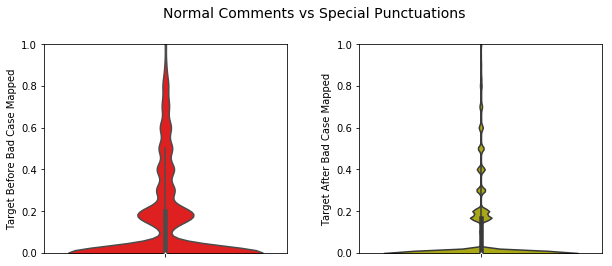

In [22]:
fig = plt.figure(figsize=(10,4))
title = fig.suptitle("Normal Comments vs Special Punctuations", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2,1)
ax1.set_ylim(top=1) 
sns.violinplot(y = train_pure['Target Before Bad Case Mapped'], ax=ax1, shade=True, color='r')

ax2 = fig.add_subplot(1,2,2)
ax2.set_ylim(top=1) 
sns.violinplot(y = train_pure['Target After Bad Case Mapped'], ax=ax2, shade=True, color='y')

In [23]:
print('Mean Before Mapped: '+ str(train_pure.loc[:,'Target Before Bad Case Mapped'].mean()))
print('Mean After Mapped: '+ str(train_pure.loc[:,'Target After Bad Case Mapped'].mean()))

Mean Before Mapped: 0.15332360651866278
Mean After Mapped: 0.10301729306264126


So, how can I evaluate did I lose some information? or did I changed something which I shouldn't? 

Besides mean, there are quite some other mothods. An easy way is using "wasserstein distance", which is a distance function defined between probability distributions on a given metric. [Take a look at a short introduction here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wasserstein_distance.html)

In [24]:
import scipy.stats
from tqdm import tqdm

In [25]:
mapping_dict_sample = {"disagreemen": "disagreement","demonetize": "demonetized","takeove": "takeover","nationalpost": "national post","Im": "I am","covfefe": "coverage","microaggression": "micro aggression","WW 2": "WW2","aswell": "as well","trumpsters": "trumpeters","Drumpf": "Trump","enivironment": "environment","Trumpster": "trumpeters","Trimp": "Trump","Français": "France","Trumpers": "president trump","dont": "do not","WW 1": "WW1","Führer": "Fuhrer","wouldd": "would","Eurooe": "Europe","pizza gate": "debunked conspiracy theory","Russions": "Russians","forgetfulnes": "forgetfulness","gevernment": "government","Russiagate": "Russia gate","negetively": "negatively","commencial": "commercial","whitelash": "white lash","conciousnes": "conciousness","presumptuousnes": "presumptuousness","sexualises": "sexualise","dilusion": "delusion","repurcussion": "repercussion","FusionGPS": "Fusion GPS","hypersexualize": "hyper sexualize","indiginious": "indigenous","hetereosexual": "heterosexual","jusification": "justification","becausr": "because","homosexulity": "homosexuality","cakemaker": "cake maker","disquss": "discuss","alimoney": "alimony","Demonetisation": "demonetization","sexuallly": "sexually","transexualism": "transsexualism","ignoramouses": "ignoramuses","homosexualtiy": "homosexuality","timefram": "timeframe","manies": "many","rangeman": "range man","dogooder": "do gooder","manspread": "man spread","golddig": "gold dig","knowlefge": "knowledge","righteouness": "righteousness","manufacturig": "manufacturing","timewaste": "time waste","iPhone7": "iPhone 7","everyonr": "everyone","pretex": "pretext","thiests": "atheists","sexpat": "sex tourism","usefl": "useful","CONgressi": "Congress","eduacated": "educated","germeny": "Germany","coincidents": "coincidence","coreligionist": "co religionist","islamphobic": "islam phobic"}


In [26]:
def check_cleaning_wasserstein(cleaningdict = mapping_dict_sample, data = train):
    i = 0
    data_before_cleaning = data.iloc[:, 1:3]
    data_after_cleaning = data.iloc[:, 1:3]
    wasserstein_distance = pd.DataFrame({'Before':list(cleaningdict.keys()), 'After':list(cleaningdict.values())}) 
    wasserstein_distance['wasserstein'] = np.nan

    for key, value in tqdm(cleaningdict.items()):
        data_before_cleaning[key+'('+value+')'] = data['comment_text'].str.contains(key)
        data_after_cleaning[value+'('+key+')'] = data['comment_text'].str.contains(value)
        u_values = data_before_cleaning.loc[:1804873, 'target'][data_before_cleaning.loc[:1804873, key+'('+value+')']]
        v_values = data_after_cleaning.loc[:1804873, 'target'][data_after_cleaning.loc[:1804873, value+'('+key+')']]
        if u_values.sum()>0 and v_values.sum()>0:
            wasserstein_distance.loc[i, 'wasserstein'] = scipy.stats.wasserstein_distance(u_values,v_values)
        i+=1
    wasserstein_distance = wasserstein_distance.sort_values(by=['wasserstein'])    
    return wasserstein_distance

In [27]:
mapping_dict_sample_wasserstein = check_cleaning_wasserstein(cleaningdict = mapping_dict_sample)

100%|██████████| 71/71 [04:11<00:00,  3.77s/it]


The "wasserstein" column presents the minimum amount of “work” required to transfer from target distribution before mapped, to target distribution after mapped, which is also how much information did we change by mapping. If you would like to do some words mapping, you can easily check how much information did you change. ("wasserstein distance == 0" might because of the same words are selected)

In [28]:
mapping_dict_sample_wasserstein

,Before,After,wasserstein
0,disagreemen,disagreement,0.000000
30,presumptuousnes,presumptuousness,0.000000
29,conciousnes,conciousness,0.000000
23,forgetfulnes,forgetfulness,0.000000
49,timefram,timeframe,0.000000
2,takeove,takeover,0.000000
1,demonetize,demonetized,0.000000
61,pretex,pretext,0.000482
4,Im,I am,0.005660
3,nationalpost,national post,0.012574
